##  Linear models

### 1. A Simple Linear Regression Example ([source](https://github.com/scikit-learn/scikit-learn/tree/master/examples/linear_model))

This example uses the only the first feature of the `diabetes` dataset, in
order to illustrate a two-dimensional plot of this regression technique. The
straight line can be seen in the plot, showing how linear regression attempts
to draw a straight line that will best minimize the residual sum of squares
between the observed responses in the dataset, and the responses predicted by
the linear approximation.

The ```coefficients```, the ```residual sum of squares``` and the ```variance score``` are also
calculated.

In [5]:
import numpy as np
from sklearn import datasets, linear_model

- Import  Diabetes Dataset

In [6]:
diabetes = datasets.load_diabetes()

'''Use only one feature'''
diabetes_X = diabetes.data[:, np.newaxis, 2]

- Split Dataset to Train and Test

In [7]:
'''Split the data into training/testing sets'''
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

'''Split the targets into training/testing sets'''
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test = diabetes.target[-20:]

- Fit the Model

In [8]:
'''Create linear regression object'''
regr = linear_model.LinearRegression()

'''Train the model using the training sets'''
regr.fit(diabetes_X_train, diabetes_y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

- Calculate Regression cofficient, Mean Squared Error and Variance score.

In [9]:
'''The coefficients'''
print('Coefficients: \n', regr.coef_)


'''The mean squared error'''
print("Mean squared error: %.2f"
      % np.mean((regr.predict(diabetes_X_test) - diabetes_y_test) ** 2))


'''Explained variance score: 1 is perfect prediction'''
print('Variance score: %.2f' % regr.score(diabetes_X_test, diabetes_y_test))

Coefficients: 
 [938.23786125]
Mean squared error: 2548.07
Variance score: 0.47


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

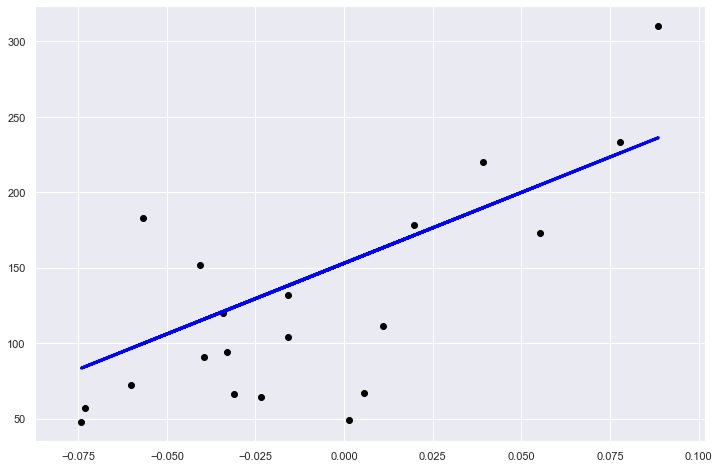

In [16]:
'''Plot outputs'''
plt.figure(figsize = [12,8])

plt.scatter(diabetes_X_test,\
            diabetes_y_test,\
            color='black')

plt.plot(diabetes_X_test,\
         regr.predict(diabetes_X_test),\
         color='blue',
         linewidth=3)

plt.grid(True)
#plt.xticks(())
#plt.yticks(())
plt.show()

### 3. Ordinary Least Squares and Ridge Regression Variance ([source](https://github.com/scikit-learn/scikit-learn/tree/master/examples/linear_model))

Due to the few points in each dimension and the straight
line that linear regression uses to follow these points
as well as it can, noise on the observations will cause
great variance as shown in the first plot. Every line's slope
can vary quite a bit for each prediction due to the noise
induced in the observations.

Ridge regression is basically minimizing a penalised version
of the least-squared function. The penalising `shrinks` the
value of the regression coefficients.
Despite the few data points in each dimension, the slope
of the prediction is much more stable and the variance
in the line itself is greatly reduced, in comparison to that
of the standard linear regression

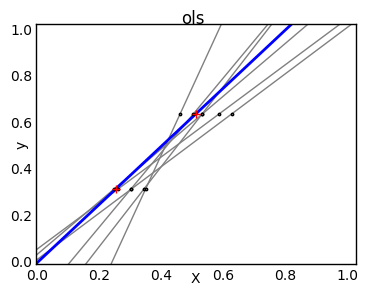

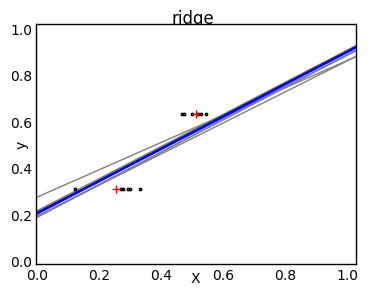

In [24]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import linear_model

X_train = np.c_[.5, 1].T
y_train = [.5, 1]
X_test = np.c_[0, 2].T

np.random.seed(0)

classifiers = dict(ols=linear_model.LinearRegression(),
                   ridge=linear_model.Ridge(alpha=.1))

fignum = 1
for name, clf in classifiers.items():
    fig = plt.figure(fignum, figsize=(4, 3))
    plt.clf()
    plt.title(name)
    ax = plt.axes([.12, .12, .8, .8])

    for _ in range(6):
        this_X = .1 * np.random.normal(size=(2, 1)) + X_train
        clf.fit(this_X, y_train)

        ax.plot(X_test, clf.predict(X_test), color='.5')
        ax.scatter(this_X, y_train, s=3, c='.5', marker='o', zorder=10)

    clf.fit(X_train, y_train)
    ax.plot(X_test, clf.predict(X_test), linewidth=2, color='blue')
    ax.scatter(X_train, y_train, s=30, c='r', marker='+', zorder=10)

    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_ylim((0, 1.6))
    ax.set_xlabel('X')
    ax.set_ylabel('y')
    ax.set_xlim(0, 2)
    fignum += 1

plt.show()


----------

### 4. Plot Ridge coefficients as a function of the L2 regularization ([source](https://github.com/scikit-learn/scikit-learn/tree/master/examples/linear_model))

`Ridge` Regression is the estimator used in this example.
Each color in the left plot represents one different dimension of the
coefficient vector, and this is displayed as a function of the
regularization parameter. The right plot shows how exact the solution
is. This example illustrates how a well defined solution is
found by Ridge regression and how regularization affects the
coefficients and their values. The plot on the right shows how
the difference of the coefficients from the estimator changes
as a function of regularization.
In this example the dependent variable Y is set as a function
of the input features:

$y = X*w + c. $

The coefficient vector w is
randomly sampled from a normal distribution, whereas the bias term c is
set to a constant.
As alpha tends toward zero the coefficients found by Ridge
regression stabilize towards the randomly sampled vector w.
For big alpha (strong regularisation) the coefficients
are smaller (eventually converging at 0) leading to a
simpler and biased solution.
These dependencies can be observed on the left plot.
The right plot shows the mean squared error between the
coefficients found by the model and the chosen vector w.
Less regularised models retrieve the exact
coefficients (error is equal to 0), stronger regularised
models increase the error.
Please note that in this example the data is non-noisy, hence
it is possible to extract the exact coefficients.

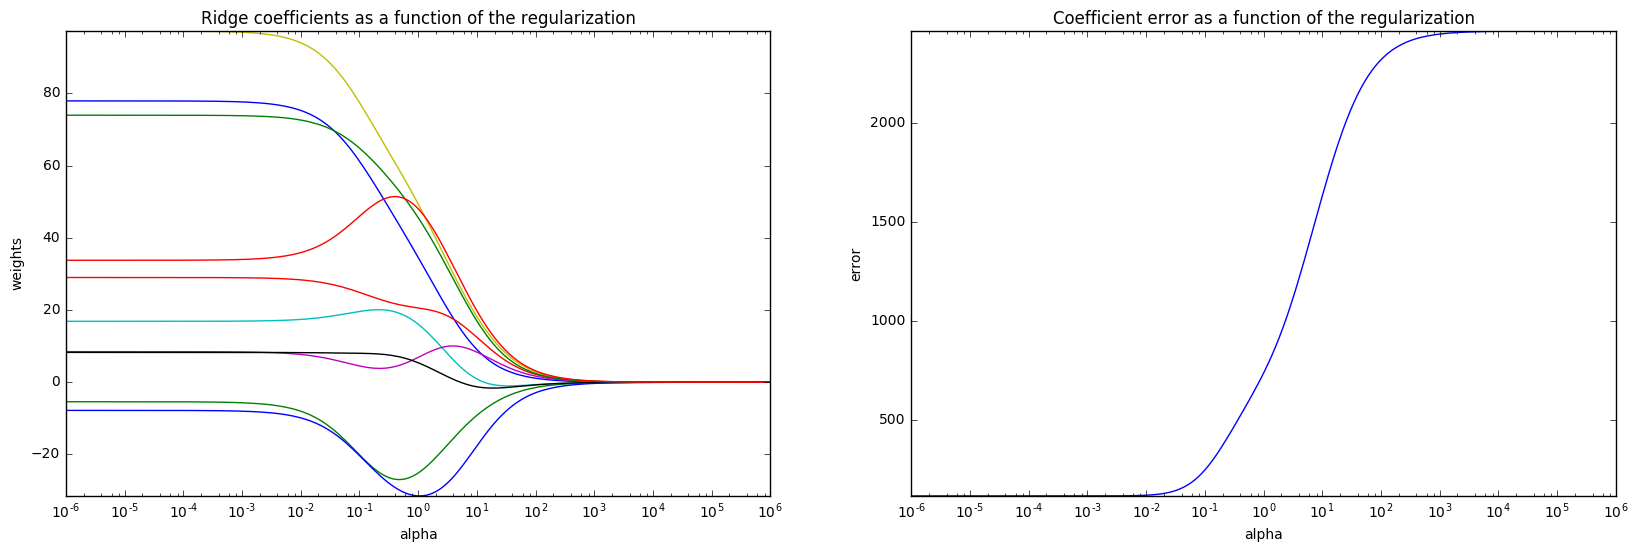

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import make_regression
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

clf = Ridge()

X, y, w = make_regression(n_samples=10, n_features=10, coef=True,
                          random_state=1, bias=3.5)

coefs = []
errors = []

alphas = np.logspace(-6, 6, 200)

# Train the model with different regularisation strengths
for a in alphas:
    clf.set_params(alpha=a)
    clf.fit(X, y)
    coefs.append(clf.coef_)
    errors.append(mean_squared_error(clf.coef_, w))

# Display results
plt.figure(figsize=(20, 6))

plt.subplot(121)
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')

plt.subplot(122)
ax = plt.gca()
ax.plot(alphas, errors)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('error')
plt.title('Coefficient error as a function of the regularization')
plt.axis('tight')

plt.show()

### 5. Plot Ridge coefficients as a function of the regularization ([source](https://github.com/scikit-learn/scikit-learn/tree/master/examples/linear_model))

Shows the effect of collinearity in the coefficients of an estimator.

Regression is the estimator used in this example.
Each color represents a different feature of the
coefficient vector, and this is displayed as a function of the
regularization parameter.

This example also shows the usefulness of applying Ridge regression
to highly ill-conditioned matrices. For such matrices, a slight
change in the target variable can cause huge variances in the
calculated weights. In such cases, it is useful to set a certain
regularization (alpha) to reduce this variation (noise).

When alpha is very large, the regularization effect dominates the
squared loss function and the coefficients tend to zero.
At the end of the path, as alpha tends toward zero
and the solution tends towards the ordinary least squares, coefficients
exhibit big oscillations. In practise it is necessary to tune alpha
in such a way that a balance is maintained between both.

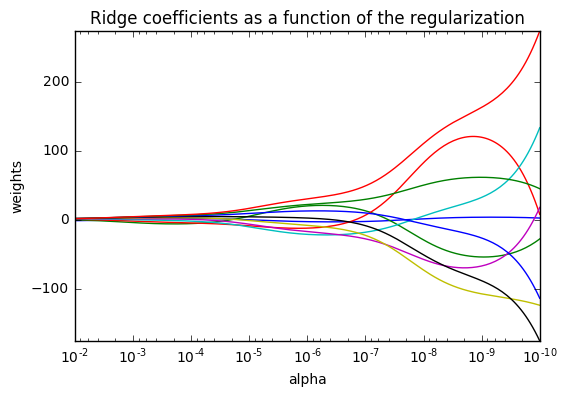

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

# X is the 10x10 Hilbert matrix
X = 1. / (np.arange(1, 11) + np.arange(0, 10)[:, np.newaxis])
y = np.ones(10)

###############################################################################
# Compute paths

n_alphas = 200
alphas = np.logspace(-10, -2, n_alphas)
clf = linear_model.Ridge(fit_intercept=False)

coefs = []
for a in alphas:
    clf.set_params(alpha=a)
    clf.fit(X, y)
    coefs.append(clf.coef_)

###############################################################################
# Display results

ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.show()


### 6. Bayesian Ridge Regression ([source](https://github.com/scikit-learn/scikit-learn/tree/master/examples/linear_model))

Computes a Bayesian Ridge Regression on a synthetic dataset.

`bayesian_ridge_regression` for more information on the regressor.

Compared to the OLS (ordinary least squares) estimator, the coefficient
weights are slightly shifted toward zeros, which stabilises them.

As the prior on the weights is a Gaussian prior, the histogram of the
estimated weights is Gaussian.

The estimation of the model is done by iteratively maximizing the
marginal log-likelihood of the observations.

We also plot predictions and uncertainties for Bayesian Ridge Regression
for one dimensional regression using polynomial feature expansion.
Note the uncertainty starts going up on the right side of the plot.
This is because these test samples are outside of the range of the training
samples.

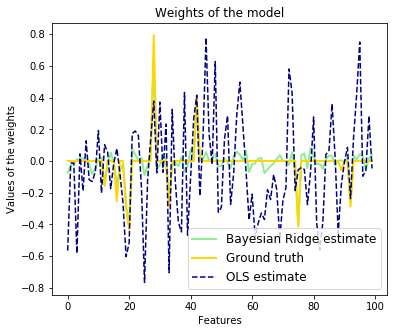

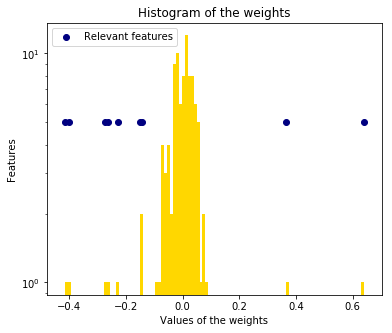

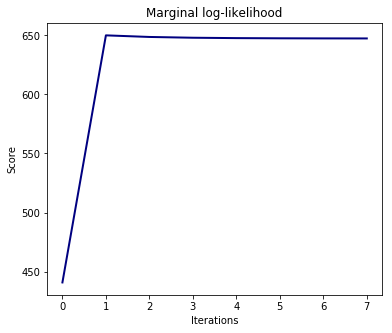

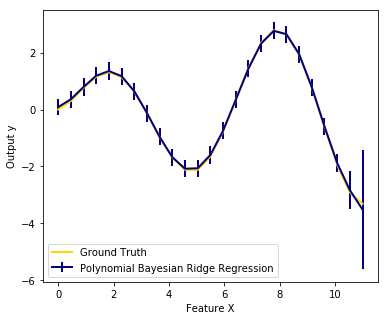

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline
from sklearn.linear_model import BayesianRidge, LinearRegression

###############################################################################
# Generating simulated data with Gaussian weights
np.random.seed(0)
n_samples, n_features = 100, 100
X = np.random.randn(n_samples, n_features)  # Create Gaussian data
# Create weights with a precision lambda_ of 4.
lambda_ = 4.
w = np.zeros(n_features)
# Only keep 10 weights of interest
relevant_features = np.random.randint(0, n_features, 10)
for i in relevant_features:
    w[i] = stats.norm.rvs(loc=0, scale=1. / np.sqrt(lambda_))
# Create noise with a precision alpha of 50.
alpha_ = 50.
noise = stats.norm.rvs(loc=0, scale=1. / np.sqrt(alpha_), size=n_samples)
# Create the target
y = np.dot(X, w) + noise

###############################################################################
# Fit the Bayesian Ridge Regression and an OLS for comparison
clf = BayesianRidge(compute_score=True)
clf.fit(X, y)

ols = LinearRegression()
ols.fit(X, y)

###############################################################################
# Plot true weights, estimated weights, histogram of the weights, and
# predictions with standard deviations
lw = 2
plt.figure(figsize=(6, 5))
plt.title("Weights of the model")
plt.plot(clf.coef_, color='lightgreen', linewidth=lw,
         label="Bayesian Ridge estimate")
plt.plot(w, color='gold', linewidth=lw, label="Ground truth")
plt.plot(ols.coef_, color='navy', linestyle='--', label="OLS estimate")
plt.xlabel("Features")
plt.ylabel("Values of the weights")
plt.legend(loc="best", prop=dict(size=12))

plt.figure(figsize=(6, 5))
plt.title("Histogram of the weights")
plt.hist(clf.coef_, bins=n_features, color='gold', log=True)
plt.scatter(clf.coef_[relevant_features], 5 * np.ones(len(relevant_features)),
            color='navy', label="Relevant features")
plt.ylabel("Features")
plt.xlabel("Values of the weights")
plt.legend(loc="upper left")

plt.figure(figsize=(6, 5))
plt.title("Marginal log-likelihood")
plt.plot(clf.scores_, color='navy', linewidth=lw)
plt.ylabel("Score")
plt.xlabel("Iterations")


# Plotting some predictions for polynomial regression
def f(x, noise_amount):
    y = np.sqrt(x) * np.sin(x)
    noise = np.random.normal(0, 1, len(x))
    return y + noise_amount * noise


degree = 10
X = np.linspace(0, 10, 100)
y = f(X, noise_amount=0.1)
clf_poly = BayesianRidge()
clf_poly.fit(np.vander(X, degree), y)

X_plot = np.linspace(0, 11, 25)
y_plot = f(X_plot, noise_amount=0)
y_mean, y_std = clf_poly.predict(np.vander(X_plot, degree), return_std=True)
plt.figure(figsize=(6, 5))
plt.errorbar(X_plot, y_mean, y_std, color='navy',
             label="Polynomial Bayesian Ridge Regression", linewidth=lw)
plt.plot(X_plot, y_plot, color='gold', linewidth=lw,
         label="Ground Truth")
plt.ylabel("Output y")
plt.xlabel("Feature X")
plt.legend(loc="lower left")
plt.show()


### 7. Logistic Regression 3-class Classifier ([source](https://github.com/scikit-learn/scikit-learn/tree/master/examples/linear_model))

Show below is a logistic-regression classifiers decision boundaries on the
`iris <https://en.wikipedia.org/wiki/Iris_flower_data_set>`_ dataset. The
datapoints are colored according to their labels.


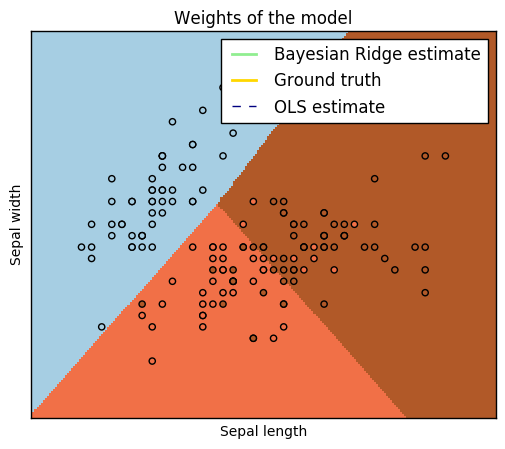

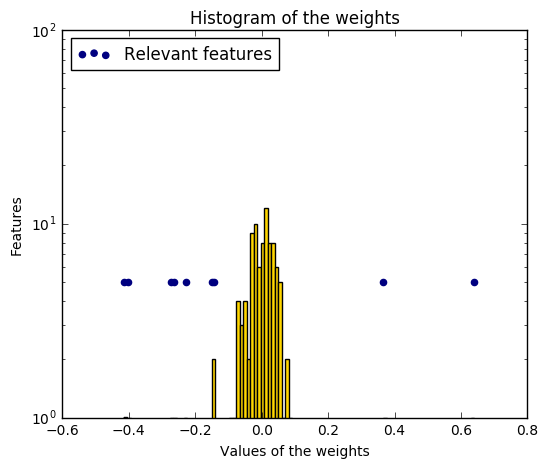

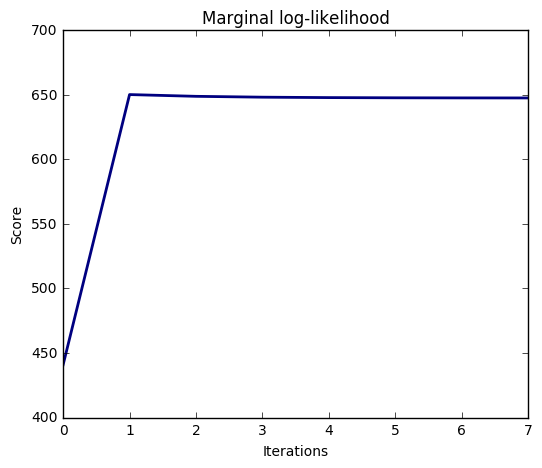

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model, datasets

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
Y = iris.target

h = .02  # step size in the mesh

logreg = linear_model.LogisticRegression(C=1e5)

# we create an instance of Neighbours Classifier and fit the data.
logreg.fit(X, Y)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()


### 8. L1 Penalty and Sparsity in Logistic Regression ([source](https://github.com/scikit-learn/scikit-learn/tree/master/examples/linear_model))

Comparison of the sparsity (percentage of zero coefficients) of solutions when
L1 and L2 penalty are used for different values of C. We can see that large
values of C give more freedom to the model.  Conversely, smaller values of C
constrain the model more. In the L1 penalty case, this leads to sparser
solutions.

We classify 8x8 images of digits into two classes: 0-4 against 5-9.
The visualization shows coefficients of the models for varying C.

C=100.00
Sparsity with L1 penalty: 4.69%
score with L1 penalty: 0.9093
Sparsity with L2 penalty: 4.69%
score with L2 penalty: 0.9098
C=1.00
Sparsity with L1 penalty: 9.38%
score with L1 penalty: 0.9098
Sparsity with L2 penalty: 4.69%
score with L2 penalty: 0.9093
C=0.01
Sparsity with L1 penalty: 85.94%
score with L1 penalty: 0.8625
Sparsity with L2 penalty: 4.69%
score with L2 penalty: 0.8915


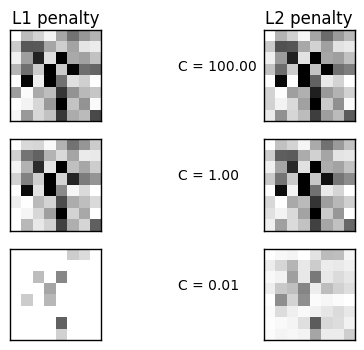

In [5]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

digits = datasets.load_digits()

X, y = digits.data, digits.target
X = StandardScaler().fit_transform(X)

# classify small against large digits
y = (y > 4).astype(np.int)


# Set regularization parameter
for i, C in enumerate((100, 1, 0.01)):
    # turn down tolerance for short training time
    clf_l1_LR = LogisticRegression(C=C, penalty='l1', tol=0.01)
    clf_l2_LR = LogisticRegression(C=C, penalty='l2', tol=0.01)
    clf_l1_LR.fit(X, y)
    clf_l2_LR.fit(X, y)

    coef_l1_LR = clf_l1_LR.coef_.ravel()
    coef_l2_LR = clf_l2_LR.coef_.ravel()

    # coef_l1_LR contains zeros due to the
    # L1 sparsity inducing norm

    sparsity_l1_LR = np.mean(coef_l1_LR == 0) * 100
    sparsity_l2_LR = np.mean(coef_l2_LR == 0) * 100

    print("C=%.2f" % C)
    print("Sparsity with L1 penalty: %.2f%%" % sparsity_l1_LR)
    print("score with L1 penalty: %.4f" % clf_l1_LR.score(X, y))
    print("Sparsity with L2 penalty: %.2f%%" % sparsity_l2_LR)
    print("score with L2 penalty: %.4f" % clf_l2_LR.score(X, y))

    l1_plot = plt.subplot(3, 2, 2 * i + 1)
    l2_plot = plt.subplot(3, 2, 2 * (i + 1))
    if i == 0:
        l1_plot.set_title("L1 penalty")
        l2_plot.set_title("L2 penalty")

    l1_plot.imshow(np.abs(coef_l1_LR.reshape(8, 8)), interpolation='nearest',
                   cmap='binary', vmax=1, vmin=0)
    l2_plot.imshow(np.abs(coef_l2_LR.reshape(8, 8)), interpolation='nearest',
                   cmap='binary', vmax=1, vmin=0)
    plt.text(-8, 3, "C = %.2f" % C)

    l1_plot.set_xticks(())
    l1_plot.set_yticks(())
    l2_plot.set_xticks(())
    l2_plot.set_yticks(())

plt.show()


### 9. Path with L1- Logistic Regression ([source](https://github.com/scikit-learn/scikit-learn/tree/master/examples/linear_model))

Computes path on IRIS dataset.

Computing regularization path ...
This took  0:00:00.036331


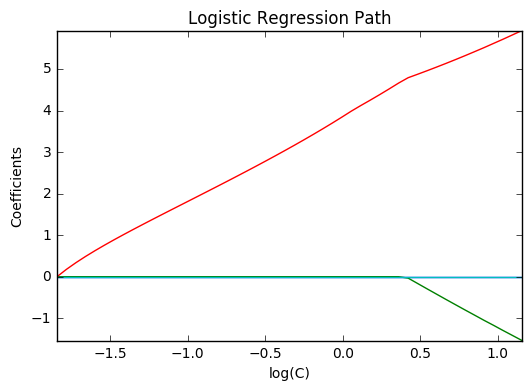

In [6]:
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt

from sklearn import linear_model
from sklearn import datasets
from sklearn.svm import l1_min_c

iris = datasets.load_iris()
X = iris.data
y = iris.target

X = X[y != 2]
y = y[y != 2]

X -= np.mean(X, 0)

###############################################################################
# Demo path functions

cs = l1_min_c(X, y, loss='log') * np.logspace(0, 3)


print("Computing regularization path ...")
start = datetime.now()
clf = linear_model.LogisticRegression(C=1.0, penalty='l1', tol=1e-6)
coefs_ = []
for c in cs:
    clf.set_params(C=c)
    clf.fit(X, y)
    coefs_.append(clf.coef_.ravel().copy())
print("This took ", datetime.now() - start)

coefs_ = np.array(coefs_)
plt.plot(np.log10(cs), coefs_)
ymin, ymax = plt.ylim()
plt.xlabel('log(C)')
plt.ylabel('Coefficients')
plt.title('Logistic Regression Path')
plt.axis('tight')
plt.show()


### 10. Logistic function ([source](https://github.com/scikit-learn/scikit-learn/tree/master/examples/linear_model))

Shown in the plot is how the logistic regression would, in this
synthetic dataset, classify values as either 0 or 1,
i.e. class one or two, using the logistic curve.

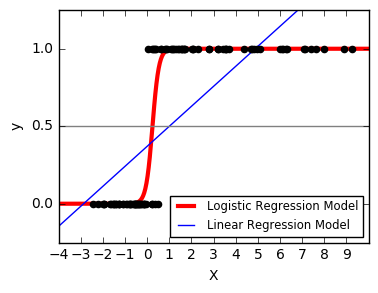

In [7]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import linear_model

# this is our test set, it's just a straight line with some
# Gaussian noise
xmin, xmax = -5, 5
n_samples = 100
np.random.seed(0)
X = np.random.normal(size=n_samples)
y = (X > 0).astype(np.float)
X[X > 0] *= 4
X += .3 * np.random.normal(size=n_samples)

X = X[:, np.newaxis]
# run the classifier
clf = linear_model.LogisticRegression(C=1e5)
clf.fit(X, y)

# and plot the result
plt.figure(1, figsize=(4, 3))
plt.clf()
plt.scatter(X.ravel(), y, color='black', zorder=20)
X_test = np.linspace(-5, 10, 300)


def model(x):
    return 1 / (1 + np.exp(-x))
loss = model(X_test * clf.coef_ + clf.intercept_).ravel()
plt.plot(X_test, loss, color='red', linewidth=3)

ols = linear_model.LinearRegression()
ols.fit(X, y)
plt.plot(X_test, ols.coef_ * X_test + ols.intercept_, linewidth=1)
plt.axhline(.5, color='.5')

plt.ylabel('y')
plt.xlabel('X')
plt.xticks(range(-5, 10))
plt.yticks([0, 0.5, 1])
plt.ylim(-.25, 1.25)
plt.xlim(-4, 10)
plt.legend(('Logistic Regression Model', 'Linear Regression Model'),
           loc="lower right", fontsize='small')
plt.show()


### 11. Plot multinomial and One-vs-Rest Logistic Regression ([source](https://github.com/scikit-learn/scikit-learn/tree/master/examples/linear_model))

Plot decision surface of multinomial and One-vs-Rest Logistic Regression.
The hyperplanes corresponding to the three One-vs-Rest (OVR) classifiers
are represented by the dashed lines.

training score : 0.995 (multinomial)
training score : 0.976 (ovr)


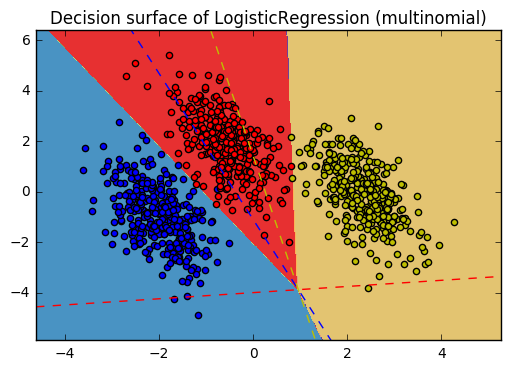

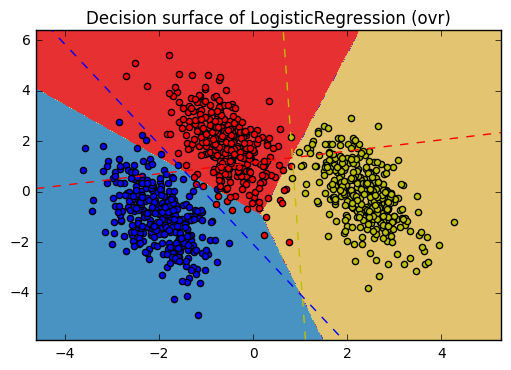

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression

# make 3-class dataset for classification
centers = [[-5, 0], [0, 1.5], [5, -1]]
X, y = make_blobs(n_samples=1000, centers=centers, random_state=40)
transformation = [[0.4, 0.2], [-0.4, 1.2]]
X = np.dot(X, transformation)

for multi_class in ('multinomial', 'ovr'):
    clf = LogisticRegression(solver='sag', max_iter=100, random_state=42,
                             multi_class=multi_class).fit(X, y)

    # print the training scores
    print("training score : %.3f (%s)" % (clf.score(X, y), multi_class))

    # create a mesh to plot in
    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
    plt.title("Decision surface of LogisticRegression (%s)" % multi_class)
    plt.axis('tight')

    # Plot also the training points
    colors = "bry"
    for i, color in zip(clf.classes_, colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, cmap=plt.cm.Paired)

    # Plot the three one-against-all classifiers
    xmin, xmax = plt.xlim()
    ymin, ymax = plt.ylim()
    coef = clf.coef_
    intercept = clf.intercept_

    def plot_hyperplane(c, color):
        def line(x0):
            return (-(x0 * coef[c, 0]) - intercept[c]) / coef[c, 1]
        plt.plot([xmin, xmax], [line(xmin), line(xmax)],
                 ls="--", color=color)

    for i, color in zip(clf.classes_, colors):
        plot_hyperplane(i, color)

plt.show()


### 12. Lasso path using LARS ([source](https://github.com/scikit-learn/scikit-learn/tree/master/examples/linear_model))

Computes Lasso Path along the regularization parameter using the LARS
algorithm on the diabetes dataset. Each color represents a different
feature of the coefficient vector, and this is displayed as a function
of the regularization parameter.

Computing regularization path using the LARS ...
.

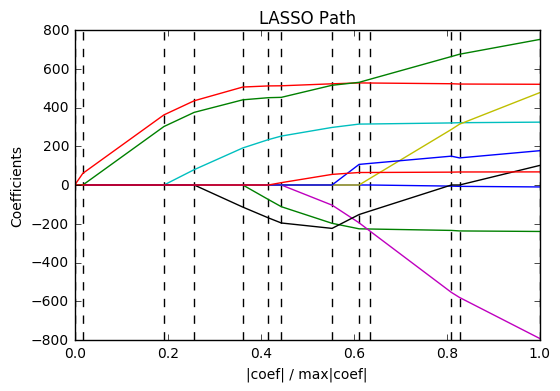

In [9]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import linear_model
from sklearn import datasets

diabetes = datasets.load_diabetes()
X = diabetes.data
y = diabetes.target

print("Computing regularization path using the LARS ...")
alphas, _, coefs = linear_model.lars_path(X, y, method='lasso', verbose=True)

xx = np.sum(np.abs(coefs.T), axis=1)
xx /= xx[-1]

plt.plot(xx, coefs.T)
ymin, ymax = plt.ylim()
plt.vlines(xx, ymin, ymax, linestyle='dashed')
plt.xlabel('|coef| / max|coef|')
plt.ylabel('Coefficients')
plt.title('LASSO Path')
plt.axis('tight')
plt.show()


### 13. Lasso and Elastic Net ([source](https://github.com/scikit-learn/scikit-learn/tree/master/examples/linear_model))

Lasso and elastic net (L1 and L2 penalisation) implemented using a
coordinate descent.

The coefficients can be forced to be positive.

Computing regularization path using the lasso...
Computing regularization path using the positive lasso...
Computing regularization path using the elastic net...
Computing regularization path using the positive elastic net...


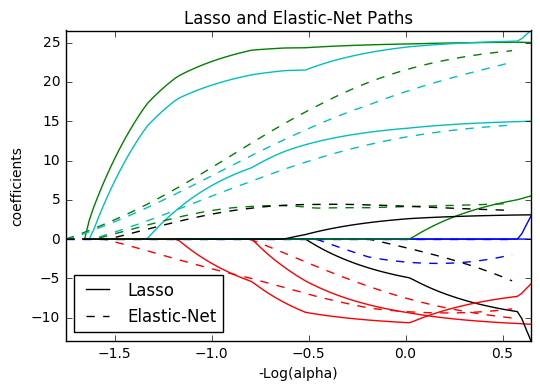

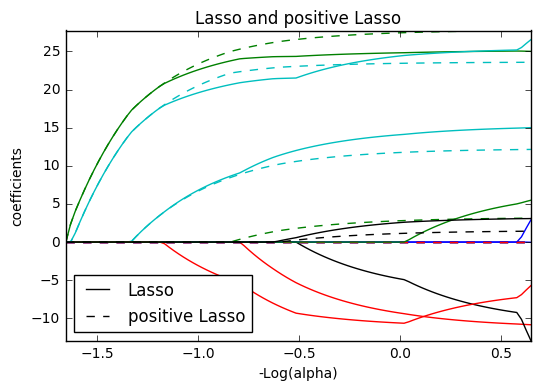

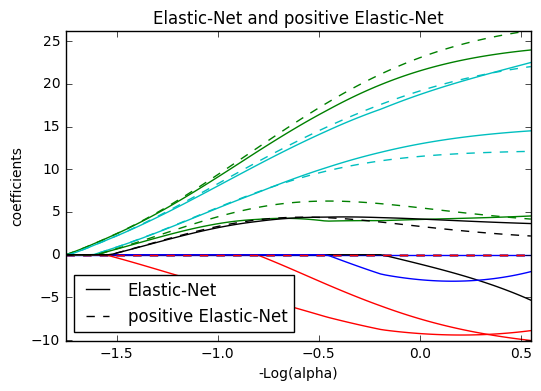

In [10]:
from itertools import cycle
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import lasso_path, enet_path
from sklearn import datasets

diabetes = datasets.load_diabetes()
X = diabetes.data
y = diabetes.target

X /= X.std(axis=0)  # Standardize data (easier to set the l1_ratio parameter)

# Compute paths

eps = 5e-3  # the smaller it is the longer is the path

print("Computing regularization path using the lasso...")
alphas_lasso, coefs_lasso, _ = lasso_path(X, y, eps, fit_intercept=False)

print("Computing regularization path using the positive lasso...")
alphas_positive_lasso, coefs_positive_lasso, _ = lasso_path(
    X, y, eps, positive=True, fit_intercept=False)
print("Computing regularization path using the elastic net...")
alphas_enet, coefs_enet, _ = enet_path(
    X, y, eps=eps, l1_ratio=0.8, fit_intercept=False)

print("Computing regularization path using the positive elastic net...")
alphas_positive_enet, coefs_positive_enet, _ = enet_path(
    X, y, eps=eps, l1_ratio=0.8, positive=True, fit_intercept=False)

# Display results

plt.figure(1)
ax = plt.gca()

colors = cycle(['b', 'r', 'g', 'c', 'k'])
neg_log_alphas_lasso = -np.log10(alphas_lasso)
neg_log_alphas_enet = -np.log10(alphas_enet)
for coef_l, coef_e, c in zip(coefs_lasso, coefs_enet, colors):
    l1 = plt.plot(neg_log_alphas_lasso, coef_l, c=c)
    l2 = plt.plot(neg_log_alphas_enet, coef_e, linestyle='--', c=c)

plt.xlabel('-Log(alpha)')
plt.ylabel('coefficients')
plt.title('Lasso and Elastic-Net Paths')
plt.legend((l1[-1], l2[-1]), ('Lasso', 'Elastic-Net'), loc='lower left')
plt.axis('tight')


plt.figure(2)
ax = plt.gca()
neg_log_alphas_positive_lasso = -np.log10(alphas_positive_lasso)
for coef_l, coef_pl, c in zip(coefs_lasso, coefs_positive_lasso, colors):
    l1 = plt.plot(neg_log_alphas_lasso, coef_l, c=c)
    l2 = plt.plot(neg_log_alphas_positive_lasso, coef_pl, linestyle='--', c=c)

plt.xlabel('-Log(alpha)')
plt.ylabel('coefficients')
plt.title('Lasso and positive Lasso')
plt.legend((l1[-1], l2[-1]), ('Lasso', 'positive Lasso'), loc='lower left')
plt.axis('tight')


plt.figure(3)
ax = plt.gca()
neg_log_alphas_positive_enet = -np.log10(alphas_positive_enet)
for (coef_e, coef_pe, c) in zip(coefs_enet, coefs_positive_enet, colors):
    l1 = plt.plot(neg_log_alphas_enet, coef_e, c=c)
    l2 = plt.plot(neg_log_alphas_positive_enet, coef_pe, linestyle='--', c=c)

plt.xlabel('-Log(alpha)')
plt.ylabel('coefficients')
plt.title('Elastic-Net and positive Elastic-Net')
plt.legend((l1[-1], l2[-1]), ('Elastic-Net', 'positive Elastic-Net'),
           loc='lower left')
plt.axis('tight')
plt.show()

### 14. Lasso model selection: Cross-Validation / AIC / BIC ([source](https://github.com/scikit-learn/scikit-learn/tree/master/examples/linear_model))

Use the Akaike information criterion (AIC), the Bayes Information
criterion (BIC) and cross-validation to select an optimal value
of the regularization parameter alpha of the :ref:`lasso` estimator.

Results obtained with LassoLarsIC are based on AIC/BIC criteria.

Information-criterion based model selection is very fast, but it
relies on a proper estimation of degrees of freedom, are
derived for large samples (asymptotic results) and assume the model
is correct, i.e. that the data are actually generated by this model.
They also tend to break when the problem is badly conditioned
(more features than samples).

For cross-validation, we use 20-fold with 2 algorithms to compute the
Lasso path: coordinate descent, as implemented by the LassoCV class, and
Lars (least angle regression) as implemented by the LassoLarsCV class.
Both algorithms give roughly the same results. They differ with regards
to their execution speed and sources of numerical errors.

Lars computes a path solution only for each kink in the path. As a
result, it is very efficient when there are only of few kinks, which is
the case if there are few features or samples. Also, it is able to
compute the full path without setting any meta parameter. On the
opposite, coordinate descent compute the path points on a pre-specified
grid (here we use the default). Thus it is more efficient if the number
of grid points is smaller than the number of kinks in the path. Such a
strategy can be interesting if the number of features is really large
and there are enough samples to select a large amount. In terms of
numerical errors, for heavily correlated variables, Lars will accumulate
more errors, while the coordinate descent algorithm will only sample the
path on a grid.

Note how the optimal value of alpha varies for each fold. This
illustrates why nested-cross validation is necessary when trying to
evaluate the performance of a method for which a parameter is chosen by
cross-validation: this choice of parameter may not be optimal for unseen
data.

/home/bitnami/anaconda3/envs/caseolap/lib/python3.6/site-packages/ipykernel_launcher.py:37: RuntimeWarning: divide by zero encountered in log10


Computing regularization path using the coordinate descent lasso...
Computing regularization path using the Lars lasso...


/home/bitnami/anaconda3/envs/caseolap/lib/python3.6/site-packages/ipykernel_launcher.py:90: RuntimeWarning: divide by zero encountered in log10


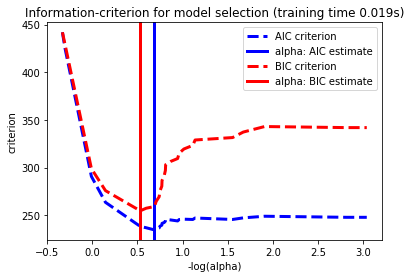

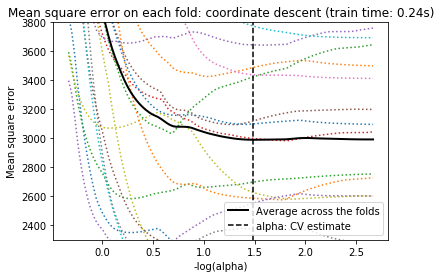

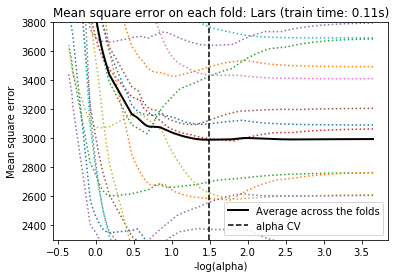

In [3]:
import time

import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LassoCV, LassoLarsCV, LassoLarsIC
from sklearn import datasets

diabetes = datasets.load_diabetes()
X = diabetes.data
y = diabetes.target

rng = np.random.RandomState(42)
X = np.c_[X, rng.randn(X.shape[0], 14)]  # add some bad features

# normalize data as done by Lars to allow for comparison
X /= np.sqrt(np.sum(X ** 2, axis=0))

##############################################################################
# LassoLarsIC: least angle regression with BIC/AIC criterion

model_bic = LassoLarsIC(criterion='bic')
t1 = time.time()
model_bic.fit(X, y)
t_bic = time.time() - t1
alpha_bic_ = model_bic.alpha_

model_aic = LassoLarsIC(criterion='aic')
model_aic.fit(X, y)
alpha_aic_ = model_aic.alpha_


def plot_ic_criterion(model, name, color):
    alpha_ = model.alpha_
    alphas_ = model.alphas_
    criterion_ = model.criterion_
    plt.plot(-np.log10(alphas_), criterion_, '--', color=color,
             linewidth=3, label='%s criterion' % name)
    plt.axvline(-np.log10(alpha_), color=color, linewidth=3,
                label='alpha: %s estimate' % name)
    plt.xlabel('-log(alpha)')
    plt.ylabel('criterion')

plt.figure()
plot_ic_criterion(model_aic, 'AIC', 'b')
plot_ic_criterion(model_bic, 'BIC', 'r')
plt.legend()
plt.title('Information-criterion for model selection (training time %.3fs)'
          % t_bic)

##############################################################################
# LassoCV: coordinate descent

# Compute paths
print("Computing regularization path using the coordinate descent lasso...")
t1 = time.time()
model = LassoCV(cv=20).fit(X, y)
t_lasso_cv = time.time() - t1

# Display results
m_log_alphas = -np.log10(model.alphas_)

plt.figure()
ymin, ymax = 2300, 3800
plt.plot(m_log_alphas, model.mse_path_, ':')
plt.plot(m_log_alphas, model.mse_path_.mean(axis=-1), 'k',
         label='Average across the folds', linewidth=2)
plt.axvline(-np.log10(model.alpha_), linestyle='--', color='k',
            label='alpha: CV estimate')

plt.legend()

plt.xlabel('-log(alpha)')
plt.ylabel('Mean square error')
plt.title('Mean square error on each fold: coordinate descent '
          '(train time: %.2fs)' % t_lasso_cv)
plt.axis('tight')
plt.ylim(ymin, ymax)

##############################################################################
# LassoLarsCV: least angle regression

# Compute paths
print("Computing regularization path using the Lars lasso...")
t1 = time.time()
model = LassoLarsCV(cv=20).fit(X, y)
t_lasso_lars_cv = time.time() - t1

# Display results
m_log_alphas = -np.log10(model.cv_alphas_)

plt.figure()
plt.plot(m_log_alphas, model.mse_path_, ':')
plt.plot(m_log_alphas, model.mse_path_.mean(axis=-1), 'k',
         label='Average across the folds', linewidth=2)
plt.axvline(-np.log10(model.alpha_), linestyle='--', color='k',
            label='alpha CV')
plt.legend()

plt.xlabel('-log(alpha)')
plt.ylabel('Mean square error')
plt.title('Mean square error on each fold: Lars (train time: %.2fs)'
          % t_lasso_lars_cv)
plt.axis('tight')
plt.ylim(ymin, ymax)

plt.show()

### 15. Lasso and Elastic Net for Sparse Signals ([source](https://github.com/scikit-learn/scikit-learn/tree/master/examples/linear_model))

Estimates Lasso and Elastic-Net regression models on a manually generated
sparse signal corrupted with an additive noise. Estimated coefficients are
compared with the ground-truth.

/Users/dibakarsigdel/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:23: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/dibakarsigdel/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:24: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)
r^2 on test data : 0.384710
ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.7,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)
r^2 on test data : 0.240176


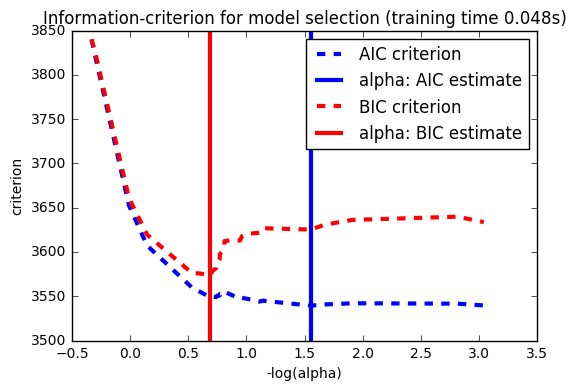

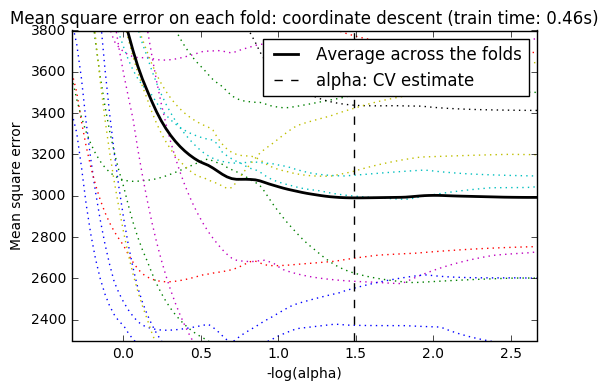

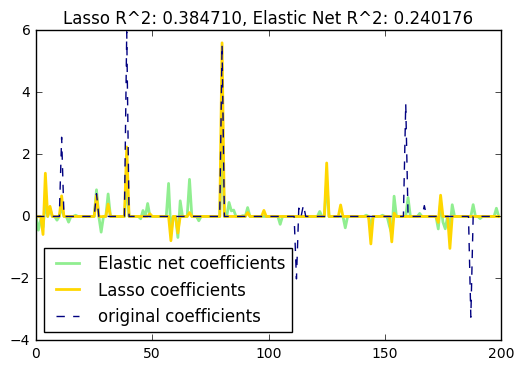

In [12]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import r2_score

###############################################################################
# generate some sparse data to play with
np.random.seed(42)

n_samples, n_features = 50, 200
X = np.random.randn(n_samples, n_features)
coef = 3 * np.random.randn(n_features)
inds = np.arange(n_features)
np.random.shuffle(inds)
coef[inds[10:]] = 0  # sparsify coef
y = np.dot(X, coef)

# add noise
y += 0.01 * np.random.normal((n_samples,))

# Split data in train set and test set
n_samples = X.shape[0]
X_train, y_train = X[:n_samples / 2], y[:n_samples / 2]
X_test, y_test = X[n_samples / 2:], y[n_samples / 2:]

###############################################################################
# Lasso
from sklearn.linear_model import Lasso

alpha = 0.1
lasso = Lasso(alpha=alpha)

y_pred_lasso = lasso.fit(X_train, y_train).predict(X_test)
r2_score_lasso = r2_score(y_test, y_pred_lasso)
print(lasso)
print("r^2 on test data : %f" % r2_score_lasso)

###############################################################################
# ElasticNet
from sklearn.linear_model import ElasticNet

enet = ElasticNet(alpha=alpha, l1_ratio=0.7)

y_pred_enet = enet.fit(X_train, y_train).predict(X_test)
r2_score_enet = r2_score(y_test, y_pred_enet)
print(enet)
print("r^2 on test data : %f" % r2_score_enet)

plt.plot(enet.coef_, color='lightgreen', linewidth=2,
         label='Elastic net coefficients')
plt.plot(lasso.coef_, color='gold', linewidth=2,
         label='Lasso coefficients')
plt.plot(coef, '--', color='navy', label='original coefficients')
plt.legend(loc='best')
plt.title("Lasso R^2: %f, Elastic Net R^2: %f"
          % (r2_score_lasso, r2_score_enet))
plt.show()


### 16. Joint feature selection with multi-task Lasso ([source](https://github.com/scikit-learn/scikit-learn/tree/master/examples/linear_model))

The multi-task lasso allows to fit multiple regression problems
jointly enforcing the selected features to be the same across
tasks. This example simulates sequential measurements, each task
is a time instant, and the relevant features vary in amplitude
over time while being the same. The multi-task lasso imposes that
features that are selected at one time point are select for all time
point. This makes feature selection by the Lasso more stable.

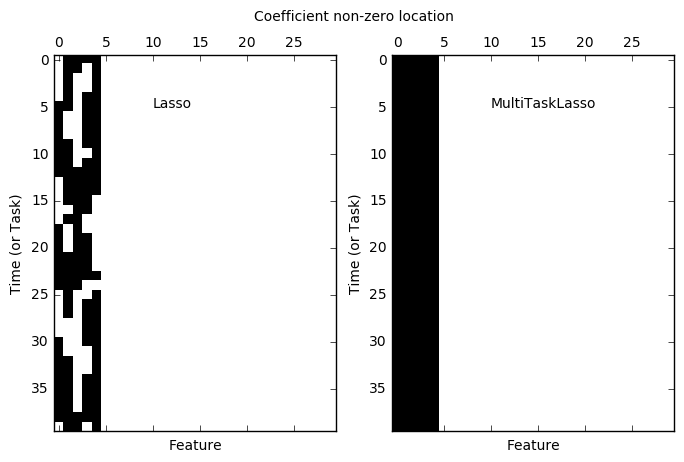

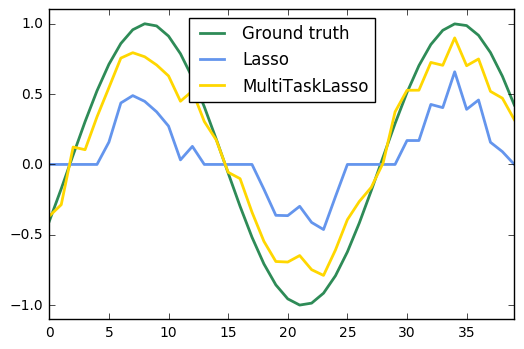

In [13]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import MultiTaskLasso, Lasso

rng = np.random.RandomState(42)

# Generate some 2D coefficients with sine waves with random frequency and phase
n_samples, n_features, n_tasks = 100, 30, 40
n_relevant_features = 5
coef = np.zeros((n_tasks, n_features))
times = np.linspace(0, 2 * np.pi, n_tasks)
for k in range(n_relevant_features):
    coef[:, k] = np.sin((1. + rng.randn(1)) * times + 3 * rng.randn(1))

X = rng.randn(n_samples, n_features)
Y = np.dot(X, coef.T) + rng.randn(n_samples, n_tasks)

coef_lasso_ = np.array([Lasso(alpha=0.5).fit(X, y).coef_ for y in Y.T])
coef_multi_task_lasso_ = MultiTaskLasso(alpha=1.).fit(X, Y).coef_

###############################################################################
# Plot support and time series
fig = plt.figure(figsize=(8, 5))
plt.subplot(1, 2, 1)
plt.spy(coef_lasso_)
plt.xlabel('Feature')
plt.ylabel('Time (or Task)')
plt.text(10, 5, 'Lasso')
plt.subplot(1, 2, 2)
plt.spy(coef_multi_task_lasso_)
plt.xlabel('Feature')
plt.ylabel('Time (or Task)')
plt.text(10, 5, 'MultiTaskLasso')
fig.suptitle('Coefficient non-zero location')

feature_to_plot = 0
plt.figure()
lw = 2
plt.plot(coef[:, feature_to_plot], color='seagreen', linewidth=lw,
         label='Ground truth')
plt.plot(coef_lasso_[:, feature_to_plot], color='cornflowerblue', linewidth=lw,
         label='Lasso')
plt.plot(coef_multi_task_lasso_[:, feature_to_plot], color='gold', linewidth=lw,
         label='MultiTaskLasso')
plt.legend(loc='upper center')
plt.axis('tight')
plt.ylim([-1.1, 1.1])
plt.show()


### 17. Lasso on dense and sparse data ([source](https://github.com/scikit-learn/scikit-learn/tree/master/examples/linear_model))

We show that linear_model.Lasso provides the same results for dense and sparse
data and that in the case of sparse data the speed is improved.

In [14]:
from time import time
from scipy import sparse
from scipy import linalg

from sklearn.datasets.samples_generator import make_regression
from sklearn.linear_model import Lasso


###############################################################################
# The two Lasso implementations on Dense data
print("--- Dense matrices")

X, y = make_regression(n_samples=200, n_features=5000, random_state=0)
X_sp = sparse.coo_matrix(X)

alpha = 1
sparse_lasso = Lasso(alpha=alpha, fit_intercept=False, max_iter=1000)
dense_lasso = Lasso(alpha=alpha, fit_intercept=False, max_iter=1000)

t0 = time()
sparse_lasso.fit(X_sp, y)
print("Sparse Lasso done in %fs" % (time() - t0))

t0 = time()
dense_lasso.fit(X, y)
print("Dense Lasso done in %fs" % (time() - t0))

print("Distance between coefficients : %s"
      % linalg.norm(sparse_lasso.coef_ - dense_lasso.coef_))

###############################################################################
# The two Lasso implementations on Sparse data
print("--- Sparse matrices")

Xs = X.copy()
Xs[Xs < 2.5] = 0.0
Xs = sparse.coo_matrix(Xs)
Xs = Xs.tocsc()

print("Matrix density : %s %%" % (Xs.nnz / float(X.size) * 100))

alpha = 0.1
sparse_lasso = Lasso(alpha=alpha, fit_intercept=False, max_iter=10000)
dense_lasso = Lasso(alpha=alpha, fit_intercept=False, max_iter=10000)

t0 = time()
sparse_lasso.fit(Xs, y)
print("Sparse Lasso done in %fs" % (time() - t0))

t0 = time()
dense_lasso.fit(Xs.toarray(), y)
print("Dense Lasso done in %fs" % (time() - t0))

print("Distance between coefficients : %s"
      % linalg.norm(sparse_lasso.coef_ - dense_lasso.coef_))


--- Dense matrices
Sparse Lasso done in 0.385830s
Dense Lasso done in 0.069551s
Distance between coefficients : 8.407255028117243e-14
--- Sparse matrices
Matrix density : 0.6263000000000001 %
Sparse Lasso done in 0.237209s
Dense Lasso done in 1.616462s
Distance between coefficients : 1.0424172088134681e-11


### 18. Plot multi-class SGD on the iris dataset ([source](https://github.com/scikit-learn/scikit-learn/tree/master/examples/linear_model))

Plot decision surface of multi-class SGD on iris dataset.
The hyperplanes corresponding to the three one-versus-all (OVA) classifiers
are represented by the dashed lines.

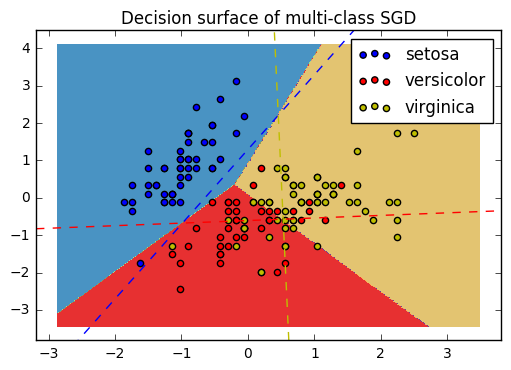

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.linear_model import SGDClassifier

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features. We could
                      # avoid this ugly slicing by using a two-dim dataset
y = iris.target
colors = "bry"

# shuffle
idx = np.arange(X.shape[0])
np.random.seed(13)
np.random.shuffle(idx)
X = X[idx]
y = y[idx]

# standardize
mean = X.mean(axis=0)
std = X.std(axis=0)
X = (X - mean) / std

h = .02  # step size in the mesh

clf = SGDClassifier(alpha=0.001, n_iter=100).fit(X, y)

# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
# Put the result into a color plot
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
plt.axis('tight')

# Plot also the training points
for i, color in zip(clf.classes_, colors):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                cmap=plt.cm.Paired)
plt.title("Decision surface of multi-class SGD")
plt.axis('tight')

# Plot the three one-against-all classifiers
xmin, xmax = plt.xlim()
ymin, ymax = plt.ylim()
coef = clf.coef_
intercept = clf.intercept_


def plot_hyperplane(c, color):
    def line(x0):
        return (-(x0 * coef[c, 0]) - intercept[c]) / coef[c, 1]

    plt.plot([xmin, xmax], [line(xmin), line(xmax)],
             ls="--", color=color)

for i, color in zip(clf.classes_, colors):
    plot_hyperplane(i, color)
plt.legend()
plt.show()

### 19. SGD: Penalties ([source](https://github.com/scikit-learn/scikit-learn/tree/master/examples/linear_model))

Plot the contours of the three penalties.

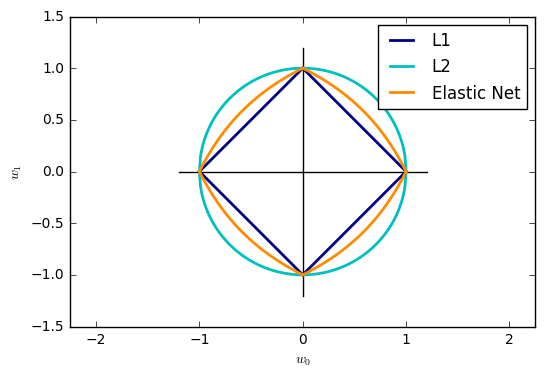

In [16]:
import numpy as np
import matplotlib.pyplot as plt


def l1(xs):
    return np.array([np.sqrt((1 - np.sqrt(x ** 2.0)) ** 2.0) for x in xs])


def l2(xs):
    return np.array([np.sqrt(1.0 - x ** 2.0) for x in xs])


def el(xs, z):
    return np.array([(2 - 2 * x - 2 * z + 4 * x * z -
                      (4 * z ** 2
                       - 8 * x * z ** 2
                       + 8 * x ** 2 * z ** 2
                       - 16 * x ** 2 * z ** 3
                       + 8 * x * z ** 3 + 4 * x ** 2 * z ** 4) ** (1. / 2)
                      - 2 * x * z ** 2) / (2 - 4 * z) for x in xs])


def cross(ext):
    plt.plot([-ext, ext], [0, 0], "k-")
    plt.plot([0, 0], [-ext, ext], "k-")

xs = np.linspace(0, 1, 100)

alpha = 0.501  # 0.5 division throuh zero

cross(1.2)

l1_color = "navy"
l2_color = "c"
elastic_net_color = "darkorange"
lw = 2

plt.plot(xs, l1(xs), color=l1_color, label="L1", lw=lw)
plt.plot(xs, -1.0 * l1(xs), color=l1_color, lw=lw)
plt.plot(-1 * xs, l1(xs), color=l1_color, lw=lw)
plt.plot(-1 * xs, -1.0 * l1(xs), color=l1_color, lw=lw)

plt.plot(xs, l2(xs), color=l2_color, label="L2", lw=lw)
plt.plot(xs, -1.0 * l2(xs), color=l2_color, lw=lw)
plt.plot(-1 * xs, l2(xs), color=l2_color, lw=lw)
plt.plot(-1 * xs, -1.0 * l2(xs), color=l2_color, lw=lw)

plt.plot(xs, el(xs, alpha), color=elastic_net_color, label="Elastic Net", lw=lw)
plt.plot(xs, -1.0 * el(xs, alpha), color=elastic_net_color, lw=lw)
plt.plot(-1 * xs, el(xs, alpha), color=elastic_net_color, lw=lw)
plt.plot(-1 * xs, -1.0 * el(xs, alpha), color=elastic_net_color, lw=lw)

plt.xlabel(r"$w_0$")
plt.ylabel(r"$w_1$")
plt.legend()

plt.axis("equal")
plt.show()

### 20. Comparing various online solvers  ([source](https://github.com/scikit-learn/scikit-learn/tree/master/examples/linear_model))

An example showing how different online solvers perform
on the hand-written digits dataset.


training SGD
training ASGD
training Perceptron
training Passive-Aggressive I
training Passive-Aggressive II
training SAG


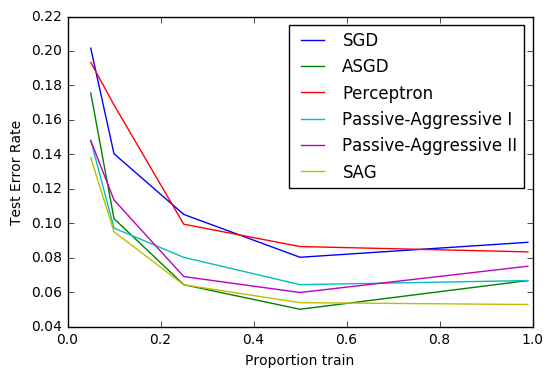

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier, Perceptron
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.linear_model import LogisticRegression

heldout = [0.95, 0.90, 0.75, 0.50, 0.01]
rounds = 20
digits = datasets.load_digits()
X, y = digits.data, digits.target

classifiers = [
    ("SGD", SGDClassifier()),
    ("ASGD", SGDClassifier(average=True)),
    ("Perceptron", Perceptron()),
    ("Passive-Aggressive I", PassiveAggressiveClassifier(loss='hinge',
                                                         C=1.0)),
    ("Passive-Aggressive II", PassiveAggressiveClassifier(loss='squared_hinge',
                                                          C=1.0)),
    ("SAG", LogisticRegression(solver='sag', tol=1e-1, C=1.e4 / X.shape[0]))
]

xx = 1. - np.array(heldout)

for name, clf in classifiers:
    print("training %s" % name)
    rng = np.random.RandomState(42)
    yy = []
    for i in heldout:
        yy_ = []
        for r in range(rounds):
            X_train, X_test, y_train, y_test = \
                train_test_split(X, y, test_size=i, random_state=rng)
            clf.fit(X_train, y_train)
            y_pred = clf.predict(X_test)
            yy_.append(1 - np.mean(y_pred == y_test))
        yy.append(np.mean(yy_))
    plt.plot(xx, yy, label=name)

plt.legend(loc="upper right")
plt.xlabel("Proportion train")
plt.ylabel("Test Error Rate")
plt.show()


### 21. SGD: convex loss functions ([source](https://github.com/scikit-learn/scikit-learn/tree/master/examples/linear_model))

A plot that compares the various convex loss functions supported by
:class:`sklearn.linear_model.SGDClassifier` .

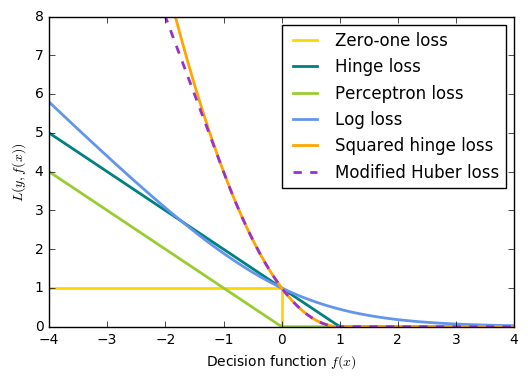

In [18]:
import numpy as np
import matplotlib.pyplot as plt


def modified_huber_loss(y_true, y_pred):
    z = y_pred * y_true
    loss = -4 * z
    loss[z >= -1] = (1 - z[z >= -1]) ** 2
    loss[z >= 1.] = 0
    return loss


xmin, xmax = -4, 4
xx = np.linspace(xmin, xmax, 100)
lw = 2
plt.plot([xmin, 0, 0, xmax], [1, 1, 0, 0], color='gold', lw=lw,
         label="Zero-one loss")
plt.plot(xx, np.where(xx < 1, 1 - xx, 0), color='teal', lw=lw,
         label="Hinge loss")
plt.plot(xx, -np.minimum(xx, 0), color='yellowgreen', lw=lw,
         label="Perceptron loss")
plt.plot(xx, np.log2(1 + np.exp(-xx)), color='cornflowerblue', lw=lw,
         label="Log loss")
plt.plot(xx, np.where(xx < 1, 1 - xx, 0) ** 2, color='orange', lw=lw,
         label="Squared hinge loss")
plt.plot(xx, modified_huber_loss(xx, 1), color='darkorchid', lw=lw,
         linestyle='--', label="Modified Huber loss")
plt.ylim((0, 8))
plt.legend(loc="upper right")
plt.xlabel(r"Decision function $f(x)$")
plt.ylabel("$L(y, f(x))$")
plt.show()


### 22. SGD: Maximum margin separating hyperplane ([source](https://github.com/scikit-learn/scikit-learn/tree/master/examples/linear_model))

Plot the maximum margin separating hyperplane within a two-class
separable dataset using a linear Support Vector Machines classifier
trained using SGD.

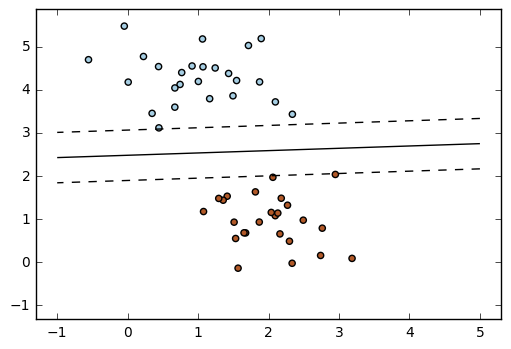

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
from sklearn.datasets.samples_generator import make_blobs

# we create 50 separable points
X, Y = make_blobs(n_samples=50, centers=2, random_state=0, cluster_std=0.60)

# fit the model
clf = SGDClassifier(loss="hinge", alpha=0.01, n_iter=200, fit_intercept=True)
clf.fit(X, Y)

# plot the line, the points, and the nearest vectors to the plane
xx = np.linspace(-1, 5, 10)
yy = np.linspace(-1, 5, 10)

X1, X2 = np.meshgrid(xx, yy)
Z = np.empty(X1.shape)
for (i, j), val in np.ndenumerate(X1):
    x1 = val
    x2 = X2[i, j]
    p = clf.decision_function([[x1, x2]])
    Z[i, j] = p[0]
levels = [-1.0, 0.0, 1.0]
linestyles = ['dashed', 'solid', 'dashed']
colors = 'k'
plt.contour(X1, X2, Z, levels, colors=colors, linestyles=linestyles)
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired)

plt.axis('tight')
plt.show()

### 23. SGD: Weighted samples  ([source](https://github.com/scikit-learn/scikit-learn/tree/master/examples/linear_model))

Plot decision function of a weighted dataset, where the size of points
is proportional to its weight.

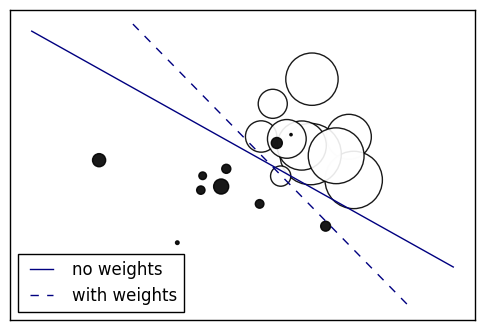

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

# we create 20 points
np.random.seed(0)
X = np.r_[np.random.randn(10, 2) + [1, 1], np.random.randn(10, 2)]
y = [1] * 10 + [-1] * 10
sample_weight = 100 * np.abs(np.random.randn(20))
# and assign a bigger weight to the last 10 samples
sample_weight[:10] *= 10

# plot the weighted data points
xx, yy = np.meshgrid(np.linspace(-4, 5, 500), np.linspace(-4, 5, 500))
plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=y, s=sample_weight, alpha=0.9,
            cmap=plt.cm.bone)

## fit the unweighted model
clf = linear_model.SGDClassifier(alpha=0.01, n_iter=100)
clf.fit(X, y)
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
no_weights = plt.contour(xx, yy, Z, levels=[0], linestyles=['solid'])

## fit the weighted model
clf = linear_model.SGDClassifier(alpha=0.01, n_iter=100)
clf.fit(X, y, sample_weight=sample_weight)
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
samples_weights = plt.contour(xx, yy, Z, levels=[0], linestyles=['dashed'])

plt.legend([no_weights.collections[0], samples_weights.collections[0]],
           ["no weights", "with weights"], loc="lower left")

plt.xticks(())
plt.yticks(())
plt.show()


### 24. Polynomial interpolation ([source](https://github.com/scikit-learn/scikit-learn/tree/master/examples/linear_model))

This example demonstrates how to approximate a function with a polynomial of
degree n_degree by using ridge regression. Concretely, from n_samples 1d
points, it suffices to build the Vandermonde matrix, which is n_samples x
n_degree+1 and has the following form:

[[1, x_1, x_1 ** 2, x_1 ** 3, ...],
 [1, x_2, x_2 ** 2, x_2 ** 3, ...],
 ...]

Intuitively, this matrix can be interpreted as a matrix of pseudo features (the
points raised to some power). The matrix is akin to (but different from) the
matrix induced by a polynomial kernel.

This example shows that you can do non-linear regression with a linear model,
using a pipeline to add non-linear features. Kernel methods extend this idea
and can induce very high (even infinite) dimensional feature spaces.

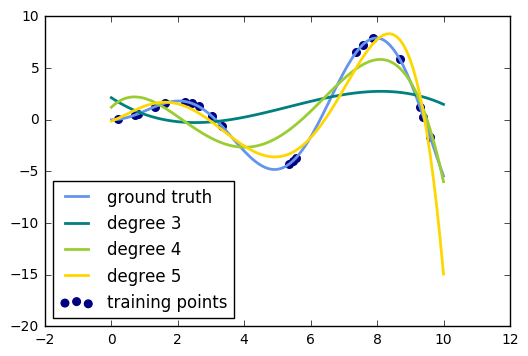

In [21]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline


def f(x):
    """ function to approximate by polynomial interpolation"""
    return x * np.sin(x)


# generate points used to plot
x_plot = np.linspace(0, 10, 100)

# generate points and keep a subset of them
x = np.linspace(0, 10, 100)
rng = np.random.RandomState(0)
rng.shuffle(x)
x = np.sort(x[:20])
y = f(x)

# create matrix versions of these arrays
X = x[:, np.newaxis]
X_plot = x_plot[:, np.newaxis]

colors = ['teal', 'yellowgreen', 'gold']
lw = 2
plt.plot(x_plot, f(x_plot), color='cornflowerblue', linewidth=lw,
         label="ground truth")
plt.scatter(x, y, color='navy', s=30, marker='o', label="training points")

for count, degree in enumerate([3, 4, 5]):
    model = make_pipeline(PolynomialFeatures(degree), Ridge())
    model.fit(X, y)
    y_plot = model.predict(X_plot)
    plt.plot(x_plot, y_plot, color=colors[count], linewidth=lw,
             label="degree %d" % degree)

plt.legend(loc='lower left')

plt.show()

### 25. Orthogonal Matching Pursuit ([source](https://github.com/scikit-learn/scikit-learn/tree/master/examples/linear_model))

Using orthogonal matching pursuit for recovering a sparse signal from a noisy
measurement encoded with a dictionary

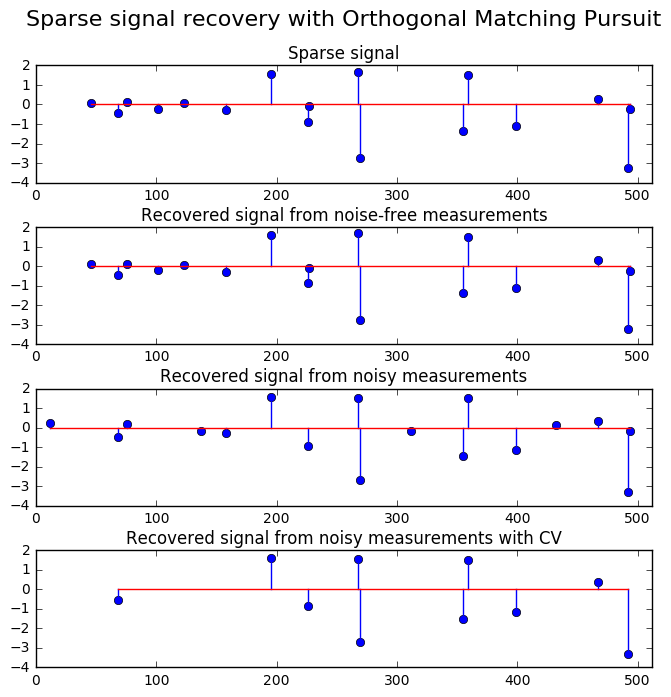

In [25]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import OrthogonalMatchingPursuit
from sklearn.linear_model import OrthogonalMatchingPursuitCV
from sklearn.datasets import make_sparse_coded_signal

n_components, n_features = 512, 100
n_nonzero_coefs = 17

# generate the data
###################

# y = Xw
# |x|_0 = n_nonzero_coefs

y, X, w = make_sparse_coded_signal(n_samples=1,
                                   n_components=n_components,
                                   n_features=n_features,
                                   n_nonzero_coefs=n_nonzero_coefs,
                                   random_state=0)

idx, = w.nonzero()

# distort the clean signal
##########################
y_noisy = y + 0.05 * np.random.randn(len(y))

# plot the sparse signal
########################
plt.figure(figsize=(7, 7))
plt.subplot(4, 1, 1)
plt.xlim(0, 512)
plt.title("Sparse signal")
plt.stem(idx, w[idx])

# plot the noise-free reconstruction
####################################

omp = OrthogonalMatchingPursuit(n_nonzero_coefs=n_nonzero_coefs)
omp.fit(X, y)
coef = omp.coef_
idx_r, = coef.nonzero()
plt.subplot(4, 1, 2)
plt.xlim(0, 512)
plt.title("Recovered signal from noise-free measurements")
plt.stem(idx_r, coef[idx_r])

# plot the noisy reconstruction
###############################
omp.fit(X, y_noisy)
coef = omp.coef_
idx_r, = coef.nonzero()
plt.subplot(4, 1, 3)
plt.xlim(0, 512)
plt.title("Recovered signal from noisy measurements")
plt.stem(idx_r, coef[idx_r])

# plot the noisy reconstruction with number of non-zeros set by CV
##################################################################
omp_cv = OrthogonalMatchingPursuitCV()
omp_cv.fit(X, y_noisy)
coef = omp_cv.coef_
idx_r, = coef.nonzero()
plt.subplot(4, 1, 4)
plt.xlim(0, 512)
plt.title("Recovered signal from noisy measurements with CV")
plt.stem(idx_r, coef[idx_r])

plt.subplots_adjust(0.06, 0.04, 0.94, 0.90, 0.20, 0.38)
plt.suptitle('Sparse signal recovery with Orthogonal Matching Pursuit',
             fontsize=16)
plt.show()

### 26. Automatic Relevance Determination Regression (ARD) ([source](https://github.com/scikit-learn/scikit-learn/tree/master/examples/linear_model))

Fit regression model with Bayesian Ridge Regression.

See :ref:`bayesian_ridge_regression` for more information on the regressor.

Compared to the OLS (ordinary least squares) estimator, the coefficient
weights are slightly shifted toward zeros, which stabilises them.

The histogram of the estimated weights is very peaked, as a sparsity-inducing
prior is implied on the weights.

The estimation of the model is done by iteratively maximizing the
marginal log-likelihood of the observations.

We also plot predictions and uncertainties for ARD
for one dimensional regression using polynomial feature expansion.
Note the uncertainty starts going up on the right side of the plot.
This is because these test samples are outside of the range of the training
samples.

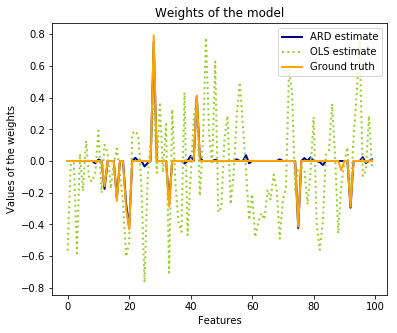

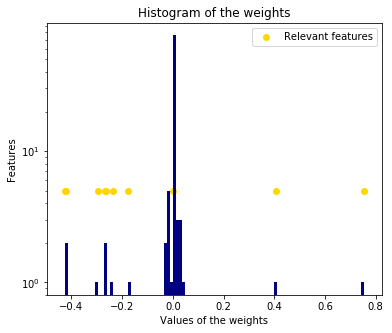

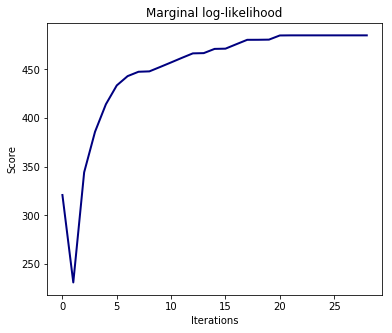

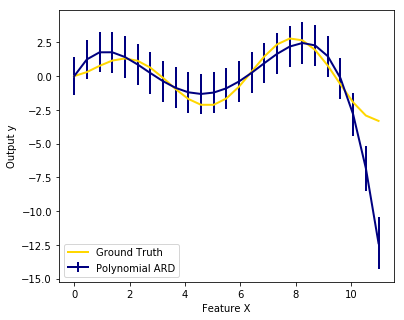

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

from sklearn.linear_model import ARDRegression, LinearRegression

###############################################################################
# Generating simulated data with Gaussian weights

# Parameters of the example
np.random.seed(0)
n_samples, n_features = 100, 100
# Create Gaussian data
X = np.random.randn(n_samples, n_features)
# Create weights with a precision lambda_ of 4.
lambda_ = 4.
w = np.zeros(n_features)
# Only keep 10 weights of interest
relevant_features = np.random.randint(0, n_features, 10)
for i in relevant_features:
    w[i] = stats.norm.rvs(loc=0, scale=1. / np.sqrt(lambda_))
# Create noise with a precision alpha of 50.
alpha_ = 50.
noise = stats.norm.rvs(loc=0, scale=1. / np.sqrt(alpha_), size=n_samples)
# Create the target
y = np.dot(X, w) + noise

###############################################################################
# Fit the ARD Regression
clf = ARDRegression(compute_score=True)
clf.fit(X, y)

ols = LinearRegression()
ols.fit(X, y)

###############################################################################
# Plot the true weights, the estimated weights, the histogram of the
# weights, and predictions with standard deviations
plt.figure(figsize=(6, 5))
plt.title("Weights of the model")
plt.plot(clf.coef_, color='darkblue', linestyle='-', linewidth=2,
         label="ARD estimate")
plt.plot(ols.coef_, color='yellowgreen', linestyle=':', linewidth=2,
         label="OLS estimate")
plt.plot(w, color='orange', linestyle='-', linewidth=2, label="Ground truth")
plt.xlabel("Features")
plt.ylabel("Values of the weights")
plt.legend(loc=1)

plt.figure(figsize=(6, 5))
plt.title("Histogram of the weights")
plt.hist(clf.coef_, bins=n_features, color='navy', log=True)
plt.scatter(clf.coef_[relevant_features], 5 * np.ones(len(relevant_features)),
            color='gold', marker='o', label="Relevant features")
plt.ylabel("Features")
plt.xlabel("Values of the weights")
plt.legend(loc=1)

plt.figure(figsize=(6, 5))
plt.title("Marginal log-likelihood")
plt.plot(clf.scores_, color='navy', linewidth=2)
plt.ylabel("Score")
plt.xlabel("Iterations")


# Plotting some predictions for polynomial regression
def f(x, noise_amount):
    y = np.sqrt(x) * np.sin(x)
    noise = np.random.normal(0, 1, len(x))
    return y + noise_amount * noise


degree = 10
X = np.linspace(0, 10, 100)
y = f(X, noise_amount=1)
clf_poly = ARDRegression(threshold_lambda=1e5)
clf_poly.fit(np.vander(X, degree), y)

X_plot = np.linspace(0, 11, 25)
y_plot = f(X_plot, noise_amount=0)
y_mean, y_std = clf_poly.predict(np.vander(X_plot, degree), return_std=True)
plt.figure(figsize=(6, 5))
plt.errorbar(X_plot, y_mean, y_std, color='navy',
             label="Polynomial ARD", linewidth=2)
plt.plot(X_plot, y_plot, color='gold', linewidth=2,
         label="Ground Truth")
plt.ylabel("Output y")
plt.xlabel("Feature X")
plt.legend(loc="lower left")
plt.show()

### 27. HuberRegressor vs Ridge on dataset with strong outliers ([source](https://github.com/scikit-learn/scikit-learn/tree/master/examples/linear_model))

Fit Ridge and HuberRegressor on a dataset with outliers.

The example shows that the predictions in ridge are strongly influenced
by the outliers present in the dataset. The Huber regressor is less
influenced by the outliers since the model uses the linear loss for these.
As the parameter epsilon is increased for the Huber regressor, the decision
function approaches that of the ridge.

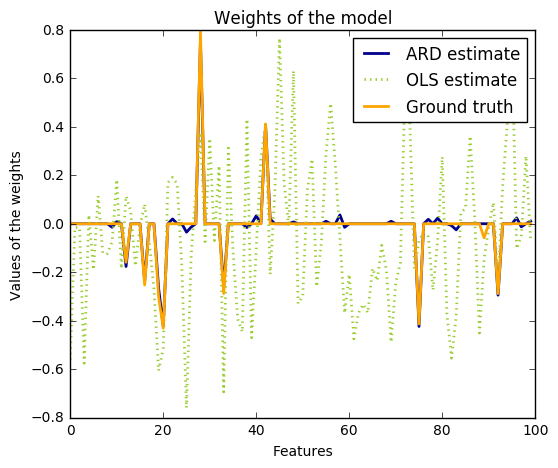

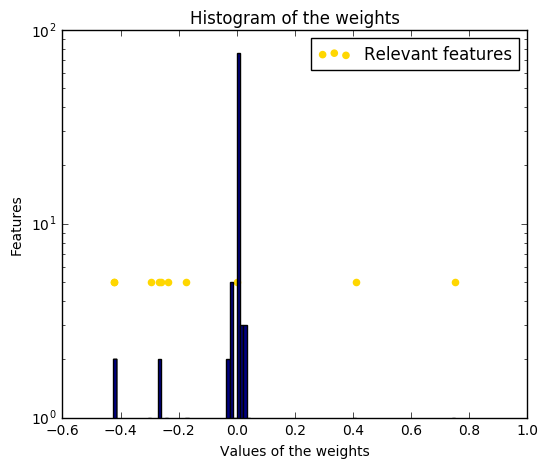

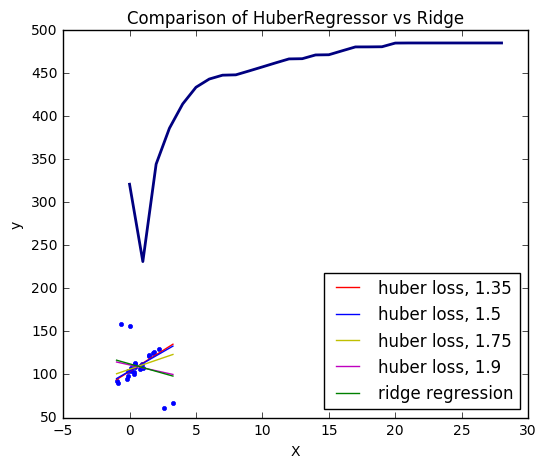

In [27]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_regression
from sklearn.linear_model import HuberRegressor, Ridge

# Generate toy data.
rng = np.random.RandomState(0)
X, y = make_regression(n_samples=20, n_features=1, random_state=0, noise=4.0,
                       bias=100.0)

# Add four strong outliers to the dataset.
X_outliers = rng.normal(0, 0.5, size=(4, 1))
y_outliers = rng.normal(0, 2.0, size=4)
X_outliers[:2, :] += X.max() + X.mean() / 4.
X_outliers[2:, :] += X.min() - X.mean() / 4.
y_outliers[:2] += y.min() - y.mean() / 4.
y_outliers[2:] += y.max() + y.mean() / 4.
X = np.vstack((X, X_outliers))
y = np.concatenate((y, y_outliers))
plt.plot(X, y, 'b.')

# Fit the huber regressor over a series of epsilon values.
colors = ['r-', 'b-', 'y-', 'm-']

x = np.linspace(X.min(), X.max(), 7)
epsilon_values = [1.35, 1.5, 1.75, 1.9]
for k, epsilon in enumerate(epsilon_values):
    huber = HuberRegressor(fit_intercept=True, alpha=0.0, max_iter=100,
                           epsilon=epsilon)
    huber.fit(X, y)
    coef_ = huber.coef_ * x + huber.intercept_
    plt.plot(x, coef_, colors[k], label="huber loss, %s" % epsilon)

# Fit a ridge regressor to compare it to huber regressor.
ridge = Ridge(fit_intercept=True, alpha=0.0, random_state=0, normalize=True)
ridge.fit(X, y)
coef_ridge = ridge.coef_
coef_ = ridge.coef_ * x + ridge.intercept_
plt.plot(x, coef_, 'g-', label="ridge regression")

plt.title("Comparison of HuberRegressor vs Ridge")
plt.xlabel("X")
plt.ylabel("y")
plt.legend(loc=0)
plt.show()


### 28. Robust linear model estimation using RANSAC ([source](https://github.com/scikit-learn/scikit-learn/tree/master/examples/linear_model))

Estimated coefficients (true, normal, RANSAC):
82.1903908407869 [ 54.17236387] [ 82.08533159]


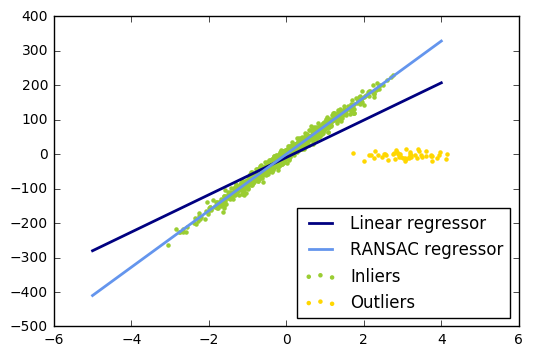

In [28]:
import numpy as np
from matplotlib import pyplot as plt

from sklearn import linear_model, datasets


n_samples = 1000
n_outliers = 50


X, y, coef = datasets.make_regression(n_samples=n_samples, n_features=1,
                                      n_informative=1, noise=10,
                                      coef=True, random_state=0)

# Add outlier data
np.random.seed(0)
X[:n_outliers] = 3 + 0.5 * np.random.normal(size=(n_outliers, 1))
y[:n_outliers] = -3 + 10 * np.random.normal(size=n_outliers)

# Fit line using all data
model = linear_model.LinearRegression()
model.fit(X, y)

# Robustly fit linear model with RANSAC algorithm
model_ransac = linear_model.RANSACRegressor(linear_model.LinearRegression())
model_ransac.fit(X, y)
inlier_mask = model_ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)

# Predict data of estimated models
line_X = np.arange(-5, 5)
line_y = model.predict(line_X[:, np.newaxis])
line_y_ransac = model_ransac.predict(line_X[:, np.newaxis])

# Compare estimated coefficients
print("Estimated coefficients (true, normal, RANSAC):")
print(coef, model.coef_, model_ransac.estimator_.coef_)

lw = 2
plt.scatter(X[inlier_mask], y[inlier_mask], color='yellowgreen', marker='.',
            label='Inliers')
plt.scatter(X[outlier_mask], y[outlier_mask], color='gold', marker='.',
            label='Outliers')
plt.plot(line_X, line_y, color='navy', linestyle='-', linewidth=lw,
         label='Linear regressor')
plt.plot(line_X, line_y_ransac, color='cornflowerblue', linestyle='-',
         linewidth=lw, label='RANSAC regressor')
plt.legend(loc='lower right')
plt.show()


### 29.  Robust linear estimator fitting ([source](https://github.com/scikit-learn/scikit-learn/tree/master/examples/linear_model))

Here a sine function is fit with a polynomial of order 3, for values
close to zero.

Robust fitting is demoed in different situations:

- No measurement errors, only modelling errors (fitting a sine with a
  polynomial)

- Measurement errors in X

- Measurement errors in y

The median absolute deviation to non corrupt new data is used to judge
the quality of the prediction.

What we can see that:

- RANSAC is good for strong outliers in the y direction

- TheilSen is good for small outliers, both in direction X and y, but has
  a break point above which it performs worse than OLS.

- The scores of HuberRegressor may not be compared directly to both TheilSen
  and RANSAC because it does not attempt to completely filter the outliers
  but lessen their effect.

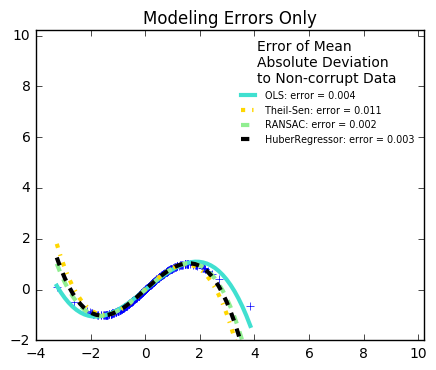

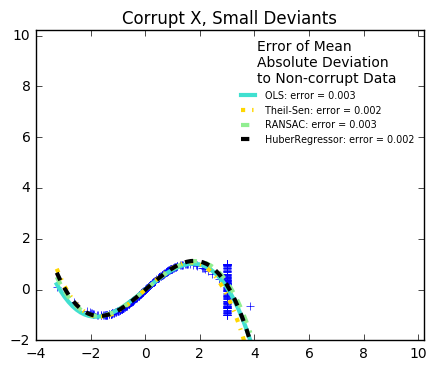

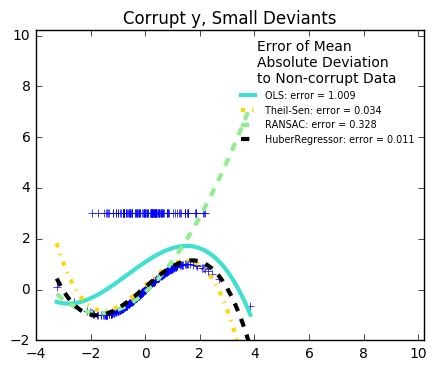

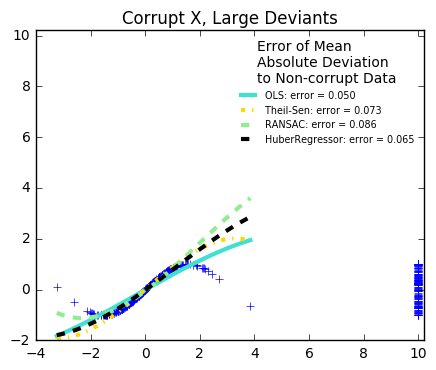

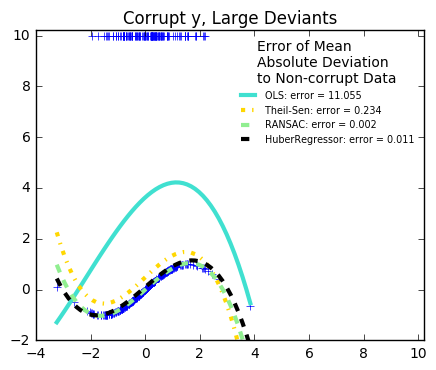

In [29]:
from matplotlib import pyplot as plt
import numpy as np

from sklearn.linear_model import (
    LinearRegression, TheilSenRegressor, RANSACRegressor, HuberRegressor)
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

np.random.seed(42)

X = np.random.normal(size=400)
y = np.sin(X)
# Make sure that it X is 2D
X = X[:, np.newaxis]

X_test = np.random.normal(size=200)
y_test = np.sin(X_test)
X_test = X_test[:, np.newaxis]

y_errors = y.copy()
y_errors[::3] = 3

X_errors = X.copy()
X_errors[::3] = 3

y_errors_large = y.copy()
y_errors_large[::3] = 10

X_errors_large = X.copy()
X_errors_large[::3] = 10

estimators = [('OLS', LinearRegression()),
              ('Theil-Sen', TheilSenRegressor(random_state=42)),
              ('RANSAC', RANSACRegressor(random_state=42)),
              ('HuberRegressor', HuberRegressor())]
colors = {'OLS': 'turquoise', 'Theil-Sen': 'gold', 'RANSAC': 'lightgreen', 'HuberRegressor': 'black'}
linestyle = {'OLS': '-', 'Theil-Sen': '-.', 'RANSAC': '--', 'HuberRegressor': '--'}
lw = 3

x_plot = np.linspace(X.min(), X.max())
for title, this_X, this_y in [
        ('Modeling Errors Only', X, y),
        ('Corrupt X, Small Deviants', X_errors, y),
        ('Corrupt y, Small Deviants', X, y_errors),
        ('Corrupt X, Large Deviants', X_errors_large, y),
        ('Corrupt y, Large Deviants', X, y_errors_large)]:
    plt.figure(figsize=(5, 4))
    plt.plot(this_X[:, 0], this_y, 'b+')

    for name, estimator in estimators:
        model = make_pipeline(PolynomialFeatures(3), estimator)
        model.fit(this_X, this_y)
        mse = mean_squared_error(model.predict(X_test), y_test)
        y_plot = model.predict(x_plot[:, np.newaxis])
        plt.plot(x_plot, y_plot, color=colors[name], linestyle=linestyle[name],
                 linewidth=lw, label='%s: error = %.3f' % (name, mse))

    legend_title = 'Error of Mean\nAbsolute Deviation\nto Non-corrupt Data'
    legend = plt.legend(loc='upper right', frameon=False, title=legend_title,
                        prop=dict(size='x-small'))
    plt.xlim(-4, 10.2)
    plt.ylim(-2, 10.2)
    plt.title(title)
plt.show()

### 30. Sparse recovery: feature selection for sparse linear models ([source](https://github.com/scikit-learn/scikit-learn/tree/master/examples/linear_model))

Given a small number of observations, we want to recover which features
of X are relevant to explain y. For this :ref:`sparse linear models
<l1_feature_selection>` can outperform standard statistical tests if the
true model is sparse, i.e. if a small fraction of the features are
relevant.

As detailed in :ref:`the compressive sensing notes
<compressive_sensing>`, the ability of L1-based approach to identify the
relevant variables depends on the sparsity of the ground truth, the
number of samples, the number of features, the conditioning of the
design matrix on the signal subspace, the amount of noise, and the
absolute value of the smallest non-zero coefficient [Wainwright2006]
(http://statistics.berkeley.edu/sites/default/files/tech-reports/709.pdf).

Here we keep all parameters constant and vary the conditioning of the
design matrix. For a well-conditioned design matrix (small mutual
incoherence) we are exactly in compressive sensing conditions (i.i.d
Gaussian sensing matrix), and L1-recovery with the Lasso performs very
well. For an ill-conditioned matrix (high mutual incoherence),
regressors are very correlated, and the Lasso randomly selects one.
However, randomized-Lasso can recover the ground truth well.

In each situation, we first vary the alpha parameter setting the sparsity
of the estimated model and look at the stability scores of the randomized
Lasso. This analysis, knowing the ground truth, shows an optimal regime
in which relevant features stand out from the irrelevant ones. If alpha
is chosen too small, non-relevant variables enter the model. On the
opposite, if alpha is selected too large, the Lasso is equivalent to
stepwise regression, and thus brings no advantage over a univariate
F-test.

In a second time, we set alpha and compare the performance of different
feature selection methods, using the area under curve (AUC) of the
precision-recall.

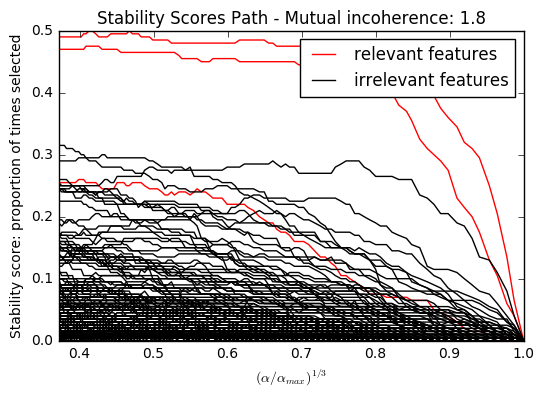

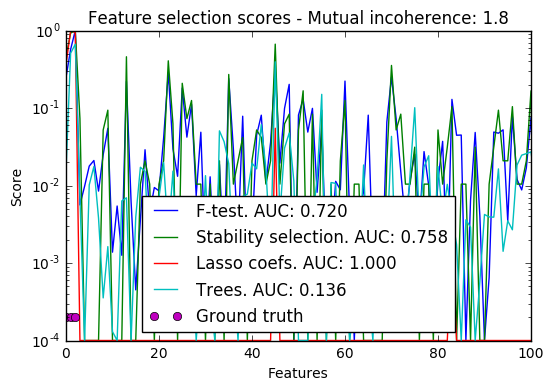

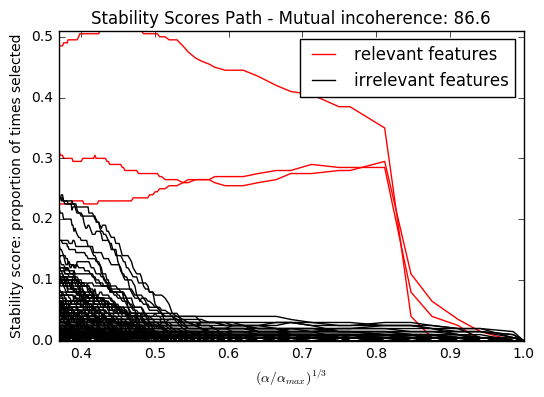

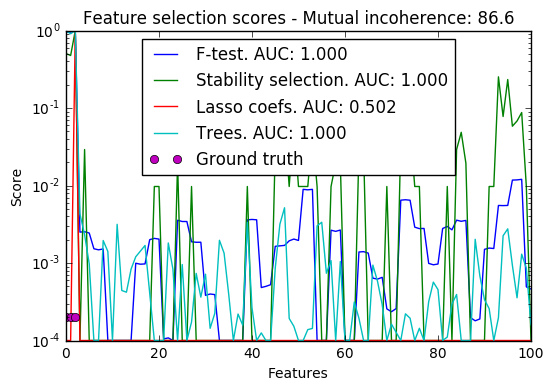

In [30]:
import warnings

import matplotlib.pyplot as plt
import numpy as np
from scipy import linalg

from sklearn.linear_model import (RandomizedLasso, lasso_stability_path,
                                  LassoLarsCV)
from sklearn.feature_selection import f_regression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import auc, precision_recall_curve
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.utils.extmath import pinvh
from sklearn.exceptions import ConvergenceWarning


def mutual_incoherence(X_relevant, X_irelevant):
    """Mutual incoherence, as defined by formula (26a) of [Wainwright2006].
    """
    projector = np.dot(np.dot(X_irelevant.T, X_relevant),
                       pinvh(np.dot(X_relevant.T, X_relevant)))
    return np.max(np.abs(projector).sum(axis=1))


for conditioning in (1, 1e-4):
    ###########################################################################
    # Simulate regression data with a correlated design
    n_features = 501
    n_relevant_features = 3
    noise_level = .2
    coef_min = .2
    # The Donoho-Tanner phase transition is around n_samples=25: below we
    # will completely fail to recover in the well-conditioned case
    n_samples = 25
    block_size = n_relevant_features

    rng = np.random.RandomState(42)

    # The coefficients of our model
    coef = np.zeros(n_features)
    coef[:n_relevant_features] = coef_min + rng.rand(n_relevant_features)

    # The correlation of our design: variables correlated by blocs of 3
    corr = np.zeros((n_features, n_features))
    for i in range(0, n_features, block_size):
        corr[i:i + block_size, i:i + block_size] = 1 - conditioning
    corr.flat[::n_features + 1] = 1
    corr = linalg.cholesky(corr)

    # Our design
    X = rng.normal(size=(n_samples, n_features))
    X = np.dot(X, corr)
    # Keep [Wainwright2006] (26c) constant
    X[:n_relevant_features] /= np.abs(
        linalg.svdvals(X[:n_relevant_features])).max()
    X = StandardScaler().fit_transform(X.copy())

    # The output variable
    y = np.dot(X, coef)
    y /= np.std(y)
    # We scale the added noise as a function of the average correlation
    # between the design and the output variable
    y += noise_level * rng.normal(size=n_samples)
    mi = mutual_incoherence(X[:, :n_relevant_features],
                            X[:, n_relevant_features:])

    ###########################################################################
    # Plot stability selection path, using a high eps for early stopping
    # of the path, to save computation time
    alpha_grid, scores_path = lasso_stability_path(X, y, random_state=42,
                                                   eps=0.05)

    plt.figure()
    # We plot the path as a function of alpha/alpha_max to the power 1/3: the
    # power 1/3 scales the path less brutally than the log, and enables to
    # see the progression along the path
    hg = plt.plot(alpha_grid[1:] ** .333, scores_path[coef != 0].T[1:], 'r')
    hb = plt.plot(alpha_grid[1:] ** .333, scores_path[coef == 0].T[1:], 'k')
    ymin, ymax = plt.ylim()
    plt.xlabel(r'$(\alpha / \alpha_{max})^{1/3}$')
    plt.ylabel('Stability score: proportion of times selected')
    plt.title('Stability Scores Path - Mutual incoherence: %.1f' % mi)
    plt.axis('tight')
    plt.legend((hg[0], hb[0]), ('relevant features', 'irrelevant features'),
               loc='best')

    ###########################################################################
    # Plot the estimated stability scores for a given alpha

    # Use 6-fold cross-validation rather than the default 3-fold: it leads to
    # a better choice of alpha:
    # Stop the user warnings outputs- they are not necessary for the example
    # as it is specifically set up to be challenging.
    with warnings.catch_warnings():
        warnings.simplefilter('ignore', UserWarning)
        warnings.simplefilter('ignore', ConvergenceWarning)
        lars_cv = LassoLarsCV(cv=6).fit(X, y)

    # Run the RandomizedLasso: we use a paths going down to .1*alpha_max
    # to avoid exploring the regime in which very noisy variables enter
    # the model
    alphas = np.linspace(lars_cv.alphas_[0], .1 * lars_cv.alphas_[0], 6)
    clf = RandomizedLasso(alpha=alphas, random_state=42).fit(X, y)
    trees = ExtraTreesRegressor(100).fit(X, y)
    # Compare with F-score
    F, _ = f_regression(X, y)

    plt.figure()
    for name, score in [('F-test', F),
                        ('Stability selection', clf.scores_),
                        ('Lasso coefs', np.abs(lars_cv.coef_)),
                        ('Trees', trees.feature_importances_),
                        ]:
        precision, recall, thresholds = precision_recall_curve(coef != 0,
                                                               score)
        plt.semilogy(np.maximum(score / np.max(score), 1e-4),
                     label="%s. AUC: %.3f" % (name, auc(recall, precision)))

    plt.plot(np.where(coef != 0)[0], [2e-4] * n_relevant_features, 'mo',
             label="Ground truth")
    plt.xlabel("Features")
    plt.ylabel("Score")
    # Plot only the 100 first coefficients
    plt.xlim(0, 100)
    plt.legend(loc='best')
    plt.title('Feature selection scores - Mutual incoherence: %.1f'
              % mi)

plt.show()


### 31.  Theil-Sen Regression ([source](https://github.com/scikit-learn/scikit-learn/tree/master/examples/linear_model))

Computes a Theil-Sen Regression on a synthetic dataset.

See :ref:`theil_sen_regression` for more information on the regressor.

Compared to the OLS (ordinary least squares) estimator, the Theil-Sen
estimator is robust against outliers. It has a breakdown point of about 29.3%
in case of a simple linear regression which means that it can tolerate
arbitrary corrupted data (outliers) of up to 29.3% in the two-dimensional
case.

The estimation of the model is done by calculating the slopes and intercepts
of a subpopulation of all possible combinations of p subsample points. If an
intercept is fitted, p must be greater than or equal to n_features + 1. The
final slope and intercept is then defined as the spatial median of these
slopes and intercepts.

In certain cases Theil-Sen performs better than :ref:`RANSAC
<ransac_regression>` which is also a robust method. This is illustrated in the
second example below where outliers with respect to the x-axis perturb RANSAC.
Tuning the ``residual_threshold`` parameter of RANSAC remedies this but in
general a priori knowledge about the data and the nature of the outliers is
needed.
Due to the computational complexity of Theil-Sen it is recommended to use it
only for small problems in terms of number of samples and features. For larger
problems the ``max_subpopulation`` parameter restricts the magnitude of all
possible combinations of p subsample points to a randomly chosen subset and
therefore also limits the runtime. Therefore, Theil-Sen is applicable to larger
problems with the drawback of losing some of its mathematical properties since
it then works on a random subset.

Automatically created module for IPython interactive environment


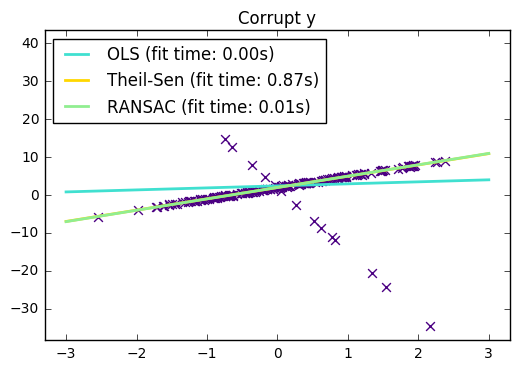

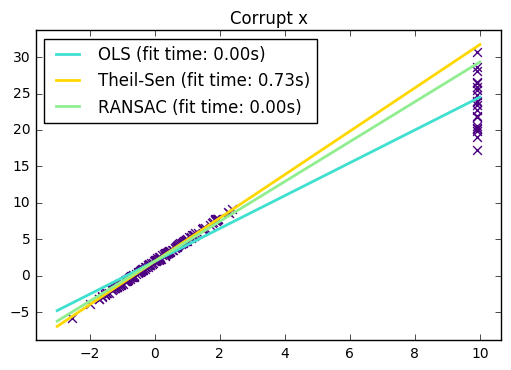

In [31]:
import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, TheilSenRegressor
from sklearn.linear_model import RANSACRegressor

print(__doc__)

estimators = [('OLS', LinearRegression()),
              ('Theil-Sen', TheilSenRegressor(random_state=42)),
              ('RANSAC', RANSACRegressor(random_state=42)), ]
colors = {'OLS': 'turquoise', 'Theil-Sen': 'gold', 'RANSAC': 'lightgreen'}
lw = 2

##############################################################################
# Outliers only in the y direction

np.random.seed(0)
n_samples = 200
# Linear model y = 3*x + N(2, 0.1**2)
x = np.random.randn(n_samples)
w = 3.
c = 2.
noise = 0.1 * np.random.randn(n_samples)
y = w * x + c + noise
# 10% outliers
y[-20:] += -20 * x[-20:]
X = x[:, np.newaxis]

plt.scatter(x, y, color='indigo', marker='x', s=40)
line_x = np.array([-3, 3])
for name, estimator in estimators:
    t0 = time.time()
    estimator.fit(X, y)
    elapsed_time = time.time() - t0
    y_pred = estimator.predict(line_x.reshape(2, 1))
    plt.plot(line_x, y_pred, color=colors[name], linewidth=lw,
             label='%s (fit time: %.2fs)' % (name, elapsed_time))

plt.axis('tight')
plt.legend(loc='upper left')
plt.title("Corrupt y")

##############################################################################
# Outliers in the X direction

np.random.seed(0)
# Linear model y = 3*x + N(2, 0.1**2)
x = np.random.randn(n_samples)
noise = 0.1 * np.random.randn(n_samples)
y = 3 * x + 2 + noise
# 10% outliers
x[-20:] = 9.9
y[-20:] += 22
X = x[:, np.newaxis]

plt.figure()
plt.scatter(x, y, color='indigo', marker='x', s=40)

line_x = np.array([-3, 10])
for name, estimator in estimators:
    t0 = time.time()
    estimator.fit(X, y)
    elapsed_time = time.time() - t0
    y_pred = estimator.predict(line_x.reshape(2, 1))
    plt.plot(line_x, y_pred, color=colors[name], linewidth=lw,
             label='%s (fit time: %.2fs)' % (name, elapsed_time))

plt.axis('tight')
plt.legend(loc='upper left')
plt.title("Corrupt x")
plt.show()
